In [1]:
%matplotlib notebook

import psycopg2.extras
import pandas as pd
from apps.backtesting.backtester_portfolio import PortfolioBacktester

from apps.backtesting.utils import datetime_to_timestamp
backtester = PortfolioBacktester(start_time=int(datetime_to_timestamp('2018/06/01 00:00:00 UTC')),
                            end_time=int(datetime_to_timestamp('2018/06/30 00:00:00 UTC')),
                            step_seconds=60*60,
                            portions_dict={
                                'LTC': 0.25,
                                'ETH': 0.25,
                                'OMG': 0.25,
                                'ETC': 0.25,
                            },
                            start_value_of_portfolio=1000)

df = backtester.value_dataframe

INFO:settings:Deployment environment detected: LOCAL
INFO:settings:LOCAL environment detected. Importing local_settings.py
INFO:redis_db:Redis connection established for app database.
INFO:redis_db:Redis currently consumes 58.74% out of 39.20G
DEBUG:root:Returning historical price data for timestamp 1527811200 (difference of 0.94375 minutes)
DEBUG:root:Returning historical price data for timestamp 1527811200 (difference of 0.9372333327929179 minutes)
DEBUG:root:Returning historical price data for timestamp 1527811200 (difference of 0.942116665840149 minutes)
DEBUG:root:Returning historical price data for timestamp 1527811200 (difference of 0.9375166654586792 minutes)
INFO:root:At timestamp 1527811200, portfolio stats are:
INFO:root:    -> total value: 1000.0, portion sum: 1.0
INFO:root:       15835.814277570154 LTC worth 250.0 BTC, 25.0% total
INFO:root:       3237.9644860055173 ETH worth 250.0 BTC, 25.0% total
INFO:root:       177304.96453900708 OMG worth 250.0 BTC, 25.0% total
INFO:r

DEBUG:root:Returning historical price data for timestamp 1527825600 (difference of 0.6633666674296061 minutes)
INFO:root:At timestamp 1527825600, portfolio stats are:
INFO:root:    -> total value: 997.6248695558112, portion sum: 1.0
INFO:root:       15792.200176594237 LTC worth 249.4062173889528 BTC, 25.0% total
INFO:root:       3258.125088361086 ETH worth 249.4062173889528 BTC, 25.0% total
INFO:root:       177135.09757738124 OMG worth 249.4062173889528 BTC, 25.0% total
INFO:root:       122438.0055910421 ETC worth 249.4062173889528 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15792.200176594237, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015793, 'value': 249.4062173889528, 'timestamp': 1527825600}, 'ETH': {'amount': 3258.125088361086, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.076549, 'value': 249.4062173889528, 'timestamp': 1527825600}, 'OMG': {'amount': 177135.09757738124, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001408, 'value': 249.4062173889528, 'timestamp': 1527

INFO:root:       124024.12296730645 ETC worth 249.53653541022058 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15865.751234118807, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015728, 'value': 249.53653541022058, 'timestamp': 1527840000}, 'ETH': {'amount': 3238.883435572148, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077044, 'value': 249.53653541022058, 'timestamp': 1527840000}, 'OMG': {'amount': 175113.35818261091, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001425, 'value': 249.53653541022058, 'timestamp': 1527840000}, 'ETC': {'amount': 124024.12296730645, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002012, 'value': 249.53653541022058, 'timestamp': 1527840000}}
DEBUG:root:Returning historical price data for timestamp 1527843600 (difference of 0.331333335240682 minutes)
DEBUG:root:Returning historical price data for timestamp 1527843600 (difference of 0.33148333231608074 minutes)
DEBUG:root:Returning historical price data for timestamp 1527843600 (difference of 0.34369

DEBUG:root:Returning historical price data for timestamp 1527858000 (difference of 0.05876666704813639 minutes)
DEBUG:root:Returning historical price data for timestamp 1527858000 (difference of 0.05355000098546346 minutes)
DEBUG:root:Returning historical price data for timestamp 1527858000 (difference of 0.05824999809265137 minutes)
DEBUG:root:Returning historical price data for timestamp 1527858000 (difference of 0.08669999837875367 minutes)
DEBUG:root:Returning historical price data for timestamp 1527858000 (difference of 0.05876666704813639 minutes)
DEBUG:root:Returning historical price data for timestamp 1527858000 (difference of 0.05355000098546346 minutes)
DEBUG:root:Returning historical price data for timestamp 1527858000 (difference of 0.05824999809265137 minutes)
DEBUG:root:Returning historical price data for timestamp 1527858000 (difference of 0.08669999837875367 minutes)
INFO:root:At timestamp 1527858000, portfolio stats are:
INFO:root:    -> total value: 1005.6114601042864

DEBUG:root:Returning historical price data for timestamp 1527872400 (difference of 32.43761666615804 minutes)
DEBUG:root:Returning historical price data for timestamp 1527872400 (difference of 32.435549998283385 minutes)
DEBUG:root:Returning historical price data for timestamp 1527872400 (difference of 32.45475000143051 minutes)
DEBUG:root:Returning historical price data for timestamp 1527872400 (difference of 32.435233334700264 minutes)
INFO:root:At timestamp 1527872400, portfolio stats are:
INFO:root:    -> total value: 1003.8943658517484, portion sum: 1.0
INFO:root:       15765.663136059873 LTC worth 250.9735914629371 BTC, 25.0% total
INFO:root:       3242.5528612782573 ETH worth 250.9735914629371 BTC, 25.0% total
INFO:root:       177995.45493825324 OMG worth 250.9735914629371 BTC, 25.0% total
INFO:root:       122665.4894735763 ETC worth 250.9735914629371 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15765.663136059873, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015919, 'value'

INFO:root:At timestamp 1527886800, portfolio stats are:
INFO:root:    -> total value: 999.7896636944706, portion sum: 1.0
INFO:root:       15697.256542336096 LTC worth 249.94741592361765 BTC, 25.0% total
INFO:root:       3284.4169711780087 ETH worth 249.94741592361765 BTC, 25.0% total
INFO:root:       176891.3063861413 OMG worth 249.94741592361765 BTC, 25.0% total
INFO:root:       122403.23992341707 ETC worth 249.94741592361765 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15697.256542336096, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015923, 'value': 249.94741592361765, 'timestamp': 1527886800}, 'ETH': {'amount': 3284.4169711780087, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.076101, 'value': 249.94741592361765, 'timestamp': 1527886800}, 'OMG': {'amount': 176891.3063861413, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001413, 'value': 249.94741592361765, 'timestamp': 1527886800}, 'ETC': {'amount': 122403.23992341707, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002042, 

INFO:root:{'LTC': {'amount': 15804.546596724465, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015932, 'value': 251.7980363790142, 'timestamp': 1527901200}, 'ETH': {'amount': 3268.4489204041356, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077039, 'value': 251.7980363790142, 'timestamp': 1527901200}, 'OMG': {'amount': 176205.7637361891, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001429, 'value': 251.7980363790142, 'timestamp': 1527901200}, 'ETC': {'amount': 122648.82434438099, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002053, 'value': 251.7980363790142, 'timestamp': 1527901200}}
DEBUG:root:Returning historical price data for timestamp 1527904800 (difference of 0.7141833345095316 minutes)
DEBUG:root:Returning historical price data for timestamp 1527904800 (difference of 0.7049166679382324 minutes)
DEBUG:root:Returning historical price data for timestamp 1527904800 (difference of 0.7129166682561239 minutes)
DEBUG:root:Returning historical price data for timestamp 15279048

DEBUG:root:Returning historical price data for timestamp 1527919200 (difference of 0.45588333209355675 minutes)
DEBUG:root:Returning historical price data for timestamp 1527919200 (difference of 0.4188166658083598 minutes)
DEBUG:root:Returning historical price data for timestamp 1527919200 (difference of 0.4185333331425985 minutes)
DEBUG:root:Returning historical price data for timestamp 1527919200 (difference of 0.4184333324432373 minutes)
DEBUG:root:Returning historical price data for timestamp 1527919200 (difference of 0.45588333209355675 minutes)
DEBUG:root:Returning historical price data for timestamp 1527919200 (difference of 0.4188166658083598 minutes)
DEBUG:root:Returning historical price data for timestamp 1527919200 (difference of 0.4185333331425985 minutes)
DEBUG:root:Returning historical price data for timestamp 1527919200 (difference of 0.4184333324432373 minutes)
INFO:root:At timestamp 1527919200, portfolio stats are:
INFO:root:    -> total value: 1023.164107046924, porti

DEBUG:root:Returning historical price data for timestamp 1527933600 (difference of 0.1631166656812032 minutes)
DEBUG:root:Returning historical price data for timestamp 1527933600 (difference of 0.14603333473205565 minutes)
DEBUG:root:Returning historical price data for timestamp 1527933600 (difference of 0.1556333343187968 minutes)
DEBUG:root:Returning historical price data for timestamp 1527933600 (difference of 0.16026666561762493 minutes)
INFO:root:At timestamp 1527933600, portfolio stats are:
INFO:root:    -> total value: 1029.4581919938005, portion sum: 1.0
INFO:root:       15955.654529137966 LTC worth 257.3645479984501 BTC, 25.0% total
INFO:root:       3310.9644943213784 ETH worth 257.3645479984501 BTC, 25.0% total
INFO:root:       171690.8258828887 OMG worth 257.3645479984501 BTC, 25.0% total
INFO:root:       123141.52125055628 ETC worth 257.3645479984501 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15955.654529137966, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01612999, '

INFO:root:At timestamp 1527948000, portfolio stats are:
INFO:root:    -> total value: 1031.3434783000982, portion sum: 1.0
INFO:root:       16090.60593952974 LTC worth 257.83586957502456 BTC, 25.0% total
INFO:root:       3335.4795271706685 ETH worth 257.83586957502456 BTC, 25.0% total
INFO:root:       167534.6780864357 OMG worth 257.83586957502456 BTC, 25.0% total
INFO:root:       124258.2503976022 ETC worth 257.83586957502456 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16090.60593952974, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.016024, 'value': 257.83586957502456, 'timestamp': 1527948000}, 'ETH': {'amount': 3335.4795271706685, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07730099, 'value': 257.83586957502456, 'timestamp': 1527948000}, 'OMG': {'amount': 167534.6780864357, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001539, 'value': 257.83586957502456, 'timestamp': 1527948000}, 'ETC': {'amount': 124258.2503976022, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002075, '

INFO:root:{'LTC': {'amount': 16057.022721441537, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01601899, 'value': 257.2172864045448, 'timestamp': 1527962400}, 'ETH': {'amount': 3334.8107298562804, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077131, 'value': 257.2172864045448, 'timestamp': 1527962400}, 'OMG': {'amount': 168335.9204218225, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001528, 'value': 257.2172864045448, 'timestamp': 1527962400}, 'ETC': {'amount': 123960.13802628664, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002075, 'value': 257.2172864045448, 'timestamp': 1527962400}}
DEBUG:root:Returning historical price data for timestamp 1527966000 (difference of 0.718149999777476 minutes)
DEBUG:root:Returning historical price data for timestamp 1527966000 (difference of 0.7163999994595845 minutes)
DEBUG:root:Returning historical price data for timestamp 1527966000 (difference of 0.7378999988238016 minutes)
DEBUG:root:Returning historical price data for timestamp 1527966

DEBUG:root:Returning historical price data for timestamp 1527980400 (difference of 0.4359333316485087 minutes)
DEBUG:root:Returning historical price data for timestamp 1527980400 (difference of 0.43519999980926516 minutes)
DEBUG:root:Returning historical price data for timestamp 1527980400 (difference of 0.4684000015258789 minutes)
DEBUG:root:Returning historical price data for timestamp 1527980400 (difference of 0.5050333340962728 minutes)
DEBUG:root:Returning historical price data for timestamp 1527980400 (difference of 0.4359333316485087 minutes)
DEBUG:root:Returning historical price data for timestamp 1527980400 (difference of 0.43519999980926516 minutes)
DEBUG:root:Returning historical price data for timestamp 1527980400 (difference of 0.4684000015258789 minutes)
DEBUG:root:Returning historical price data for timestamp 1527980400 (difference of 0.5050333340962728 minutes)
INFO:root:At timestamp 1527980400, portfolio stats are:
INFO:root:    -> total value: 1029.2694985995868, port

DEBUG:root:Returning historical price data for timestamp 1527994800 (difference of 0.1387666662534078 minutes)
DEBUG:root:Returning historical price data for timestamp 1527994800 (difference of 0.13849999904632568 minutes)
DEBUG:root:Returning historical price data for timestamp 1527994800 (difference of 0.14210000038146972 minutes)
DEBUG:root:Returning historical price data for timestamp 1527994800 (difference of 0.21458333333333332 minutes)
INFO:root:At timestamp 1527994800, portfolio stats are:
INFO:root:    -> total value: 1033.8920058303693, portion sum: 1.0
INFO:root:       16079.191381498746 LTC worth 258.4730014575923 BTC, 25.0% total
INFO:root:       3324.8819956211464 ETH worth 258.4730014575923 BTC, 25.0% total
INFO:root:       169268.5012819858 OMG worth 258.4730014575923 BTC, 25.0% total
INFO:root:       123494.61844423162 ETC worth 258.4730014575923 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16079.191381498746, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.016075, 'v

INFO:root:At timestamp 1528009200, portfolio stats are:
INFO:root:    -> total value: 1043.9196074833476, portion sum: 1.0
INFO:root:       16229.084128526638 LTC worth 260.9799018708369 BTC, 25.0% total
INFO:root:       3341.1842513229662 ETH worth 260.9799018708369 BTC, 25.0% total
INFO:root:       164345.02636702574 OMG worth 260.9799018708369 BTC, 25.0% total
INFO:root:       125471.7098980461 ETC worth 260.9799018708369 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16229.084128526638, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.016081, 'value': 260.9799018708369, 'timestamp': 1528009200}, 'ETH': {'amount': 3341.1842513229662, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07811, 'value': 260.9799018708369, 'timestamp': 1528009200}, 'OMG': {'amount': 164345.02636702574, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001588, 'value': 260.9799018708369, 'timestamp': 1528009200}, 'ETC': {'amount': 125471.7098980461, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00207999, 'valu

DEBUG:root:Returning historical price data for timestamp 1528027200 (difference of 0.30789999961853026 minutes)
DEBUG:root:Returning historical price data for timestamp 1528027200 (difference of 0.2953499992688497 minutes)
DEBUG:root:Returning historical price data for timestamp 1528027200 (difference of 0.29888333479563395 minutes)
DEBUG:root:Returning historical price data for timestamp 1528027200 (difference of 0.3018666664759318 minutes)
DEBUG:root:Returning historical price data for timestamp 1528027200 (difference of 0.30789999961853026 minutes)
DEBUG:root:Returning historical price data for timestamp 1528027200 (difference of 0.2953499992688497 minutes)
DEBUG:root:Returning historical price data for timestamp 1528027200 (difference of 0.29888333479563395 minutes)
DEBUG:root:Returning historical price data for timestamp 1528027200 (difference of 0.3018666664759318 minutes)
INFO:root:At timestamp 1528027200, portfolio stats are:
INFO:root:    -> total value: 1058.31440619894, port

DEBUG:root:Returning historical price data for timestamp 1528041600 (difference of 0.16848333279291788 minutes)
DEBUG:root:Returning historical price data for timestamp 1528041600 (difference of 0.17055000066757203 minutes)
DEBUG:root:Returning historical price data for timestamp 1528041600 (difference of 0.1903166651725769 minutes)
DEBUG:root:Returning historical price data for timestamp 1528041600 (difference of 0.17709999879201252 minutes)
INFO:root:At timestamp 1528041600, portfolio stats are:
INFO:root:    -> total value: 1056.7662914149896, portion sum: 1.0
INFO:root:       16081.785540159934 LTC worth 264.1915728537474 BTC, 25.0% total
INFO:root:       3276.1039266603925 ETH worth 264.1915728537474 BTC, 25.0% total
INFO:root:       169898.11759083436 OMG worth 264.1915728537474 BTC, 25.0% total
INFO:root:       124972.36180404323 ETC worth 264.1915728537474 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16081.785540159934, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.016428, '

INFO:root:At timestamp 1528056000, portfolio stats are:
INFO:root:    -> total value: 1043.5213465234297, portion sum: 1.0
INFO:root:       16083.877772480588 LTC worth 260.8803366308574 BTC, 25.0% total
INFO:root:       3260.474380798838 ETH worth 260.8803366308574 BTC, 25.0% total
INFO:root:       171069.07320056224 OMG worth 260.8803366308574 BTC, 25.0% total
INFO:root:       124703.79380060105 ETC worth 260.8803366308574 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16083.877772480588, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01621999, 'value': 260.8803366308574, 'timestamp': 1528056000}, 'ETH': {'amount': 3260.474380798838, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.080013, 'value': 260.8803366308574, 'timestamp': 1528056000}, 'OMG': {'amount': 171069.07320056224, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001525, 'value': 260.8803366308574, 'timestamp': 1528056000}, 'ETC': {'amount': 124703.79380060105, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002092, 'val

INFO:root:{'LTC': {'amount': 16154.009407674843, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.016184, 'value': 261.43648825380967, 'timestamp': 1528070400}, 'ETH': {'amount': 3255.9903386779793, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.080294, 'value': 261.43648825380967, 'timestamp': 1528070400}, 'OMG': {'amount': 171097.178176577, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001528, 'value': 261.43648825380967, 'timestamp': 1528070400}, 'ETC': {'amount': 124316.56272916641, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00210299, 'value': 261.43648825380967, 'timestamp': 1528070400}}
DEBUG:root:Returning historical price data for timestamp 1528074000 (difference of 0.5452333331108093 minutes)
DEBUG:root:Returning historical price data for timestamp 1528074000 (difference of 0.5407833337783814 minutes)
DEBUG:root:Returning historical price data for timestamp 1528074000 (difference of 0.5387000004450481 minutes)
DEBUG:root:Returning historical price data for timestamp 152

DEBUG:root:Returning historical price data for timestamp 1528088400 (difference of 0.2672833323478699 minutes)
DEBUG:root:Returning historical price data for timestamp 1528088400 (difference of 0.27199999888737997 minutes)
DEBUG:root:Returning historical price data for timestamp 1528088400 (difference of 0.2722666660944621 minutes)
DEBUG:root:Returning historical price data for timestamp 1528088400 (difference of 0.2700000007947286 minutes)
DEBUG:root:Returning historical price data for timestamp 1528088400 (difference of 0.2672833323478699 minutes)
DEBUG:root:Returning historical price data for timestamp 1528088400 (difference of 0.27199999888737997 minutes)
DEBUG:root:Returning historical price data for timestamp 1528088400 (difference of 0.2722666660944621 minutes)
DEBUG:root:Returning historical price data for timestamp 1528088400 (difference of 0.2700000007947286 minutes)
INFO:root:At timestamp 1528088400, portfolio stats are:
INFO:root:    -> total value: 1040.982888322992, porti

DEBUG:root:Returning historical price data for timestamp 1528102800 (difference of 0.9831833322842916 minutes)
DEBUG:root:Returning historical price data for timestamp 1528102800 (difference of 0.9861166675885519 minutes)
DEBUG:root:Returning historical price data for timestamp 1528102800 (difference of 0.022983332475026447 minutes)
DEBUG:root:Returning historical price data for timestamp 1528102800 (difference of 1.0380333344141641 minutes)
INFO:root:At timestamp 1528102800, portfolio stats are:
INFO:root:    -> total value: 1026.6228029582312, portion sum: 1.0
INFO:root:       15943.32840971287 LTC worth 256.6557007395578 BTC, 25.0% total
INFO:root:       3223.1031111334646 ETH worth 256.6557007395578 BTC, 25.0% total
INFO:root:       173181.98430469487 OMG worth 256.6557007395578 BTC, 25.0% total
INFO:root:       125750.59198700523 ETC worth 256.6557007395578 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15943.32840971287, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.016098, 'val

INFO:root:    -> total value: 1019.4711439027732, portion sum: 1.0
INFO:root:       15948.18506085626 LTC worth 254.8677859756933 BTC, 25.0% total
INFO:root:       3219.654095152024 ETH worth 254.8677859756933 BTC, 25.0% total
INFO:root:       173261.58122072963 OMG worth 254.8677859756933 BTC, 25.0% total
INFO:root:       125798.512327588 ETC worth 254.8677859756933 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15948.18506085626, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01598099, 'value': 254.8677859756933, 'timestamp': 1528117200}, 'ETH': {'amount': 3219.654095152024, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07915999, 'value': 254.8677859756933, 'timestamp': 1528117200}, 'OMG': {'amount': 173261.58122072963, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001471, 'value': 254.8677859756933, 'timestamp': 1528117200}, 'ETC': {'amount': 125798.512327588, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002026, 'value': 254.8677859756933, 'timestamp': 1528117200}}
DEBUG:root

DEBUG:root:Returning historical price data for timestamp 1528135200 (difference of 0.33195000092188515 minutes)
DEBUG:root:Returning historical price data for timestamp 1528135200 (difference of 0.3299333333969116 minutes)
DEBUG:root:Returning historical price data for timestamp 1528135200 (difference of 0.34299999872843423 minutes)
DEBUG:root:Returning historical price data for timestamp 1528135200 (difference of 0.3343000014623006 minutes)
DEBUG:root:Returning historical price data for timestamp 1528135200 (difference of 0.33195000092188515 minutes)
DEBUG:root:Returning historical price data for timestamp 1528135200 (difference of 0.3299333333969116 minutes)
DEBUG:root:Returning historical price data for timestamp 1528135200 (difference of 0.34299999872843423 minutes)
DEBUG:root:Returning historical price data for timestamp 1528135200 (difference of 0.3343000014623006 minutes)
INFO:root:At timestamp 1528135200, portfolio stats are:
INFO:root:    -> total value: 1017.3731469955518, po

DEBUG:root:Returning historical price data for timestamp 1528149600 (difference of 0.047866666316986085 minutes)
DEBUG:root:Returning historical price data for timestamp 1528149600 (difference of 0.053000001112620036 minutes)
DEBUG:root:Returning historical price data for timestamp 1528149600 (difference of 0.04741666714350382 minutes)
DEBUG:root:Returning historical price data for timestamp 1528149600 (difference of 0.04733333190282186 minutes)
INFO:root:At timestamp 1528149600, portfolio stats are:
INFO:root:    -> total value: 1022.3946546719988, portion sum: 1.0
INFO:root:       16023.98994846716 LTC worth 255.5986636679997 BTC, 25.0% total
INFO:root:       3221.561581593339 ETH worth 255.5986636679997 BTC, 25.0% total
INFO:root:       172120.31223434323 OMG worth 255.5986636679997 BTC, 25.0% total
INFO:root:       125972.72728831922 ETC worth 255.5986636679997 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16023.98994846716, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015951, '

INFO:root:At timestamp 1528164000, portfolio stats are:
INFO:root:    -> total value: 1023.389971822152, portion sum: 1.0
INFO:root:       15974.493815905222 LTC worth 255.847492955538 BTC, 25.0% total
INFO:root:       3218.450765341355 ETH worth 255.847492955538 BTC, 25.0% total
INFO:root:       172403.97099429782 OMG worth 255.847492955538 BTC, 25.0% total
INFO:root:       126282.0794449842 ETC worth 255.847492955538 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15974.493815905222, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.016016, 'value': 255.847492955538, 'timestamp': 1528164000}, 'ETH': {'amount': 3218.450765341355, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07949399, 'value': 255.847492955538, 'timestamp': 1528164000}, 'OMG': {'amount': 172403.97099429782, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001484, 'value': 255.847492955538, 'timestamp': 1528164000}, 'ETC': {'amount': 126282.0794449842, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002026, 'value': 255.8

INFO:root:{'LTC': {'amount': 16016.304415526869, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01577599, 'value': 252.67305829630774, 'timestamp': 1528178400}, 'ETH': {'amount': 3214.6699528792333, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.0786, 'value': 252.67305829630774, 'timestamp': 1528178400}, 'OMG': {'amount': 173301.13737744014, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001458, 'value': 252.67305829630774, 'timestamp': 1528178400}, 'ETC': {'amount': 125458.32090184097, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002014, 'value': 252.67305829630774, 'timestamp': 1528178400}}
DEBUG:root:Returning historical price data for timestamp 1528182000 (difference of 0.42018333276112874 minutes)
DEBUG:root:Returning historical price data for timestamp 1528182000 (difference of 0.4270166675249735 minutes)
DEBUG:root:Returning historical price data for timestamp 1528182000 (difference of 0.5113499999046326 minutes)
DEBUG:root:Returning historical price data for timestamp 15

DEBUG:root:Returning historical price data for timestamp 1528196400 (difference of 0.14053333202997845 minutes)
DEBUG:root:Returning historical price data for timestamp 1528196400 (difference of 0.14038333495457966 minutes)
DEBUG:root:Returning historical price data for timestamp 1528196400 (difference of 0.14069999853769938 minutes)
DEBUG:root:Returning historical price data for timestamp 1528196400 (difference of 0.14338333209355672 minutes)
DEBUG:root:Returning historical price data for timestamp 1528196400 (difference of 0.14053333202997845 minutes)
DEBUG:root:Returning historical price data for timestamp 1528196400 (difference of 0.14038333495457966 minutes)
DEBUG:root:Returning historical price data for timestamp 1528196400 (difference of 0.14069999853769938 minutes)
DEBUG:root:Returning historical price data for timestamp 1528196400 (difference of 0.14338333209355672 minutes)
INFO:root:At timestamp 1528196400, portfolio stats are:
INFO:root:    -> total value: 1019.1737525699123

DEBUG:root:Returning historical price data for timestamp 1528210800 (difference of 0.8310999989509582 minutes)
DEBUG:root:Returning historical price data for timestamp 1528210800 (difference of 0.825600000222524 minutes)
DEBUG:root:Returning historical price data for timestamp 1528210800 (difference of 0.8285833319028219 minutes)
DEBUG:root:Returning historical price data for timestamp 1528210800 (difference of 0.8331833322842915 minutes)
INFO:root:At timestamp 1528210800, portfolio stats are:
INFO:root:    -> total value: 1016.1800518386553, portion sum: 1.0
INFO:root:       16022.02151739903 LTC worth 254.04501295966384 BTC, 25.0% total
INFO:root:       3213.197641015902 ETH worth 254.04501295966384 BTC, 25.0% total
INFO:root:       171652.03578355664 OMG worth 254.04501295966384 BTC, 25.0% total
INFO:root:       126706.37407651103 ETC worth 254.04501295966384 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16022.02151739903, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01585599, 'v

INFO:root:At timestamp 1528225200, portfolio stats are:
INFO:root:    -> total value: 1026.6134276899832, portion sum: 1.0
INFO:root:       16054.882830132352 LTC worth 256.6533569224958 BTC, 25.0% total
INFO:root:       3216.207480231777 ETH worth 256.6533569224958 BTC, 25.0% total
INFO:root:       171102.23794833053 OMG worth 256.6533569224958 BTC, 25.0% total
INFO:root:       126742.39848024484 ETC worth 256.6533569224958 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16054.882830132352, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015986, 'value': 256.6533569224958, 'timestamp': 1528225200}, 'ETH': {'amount': 3216.207480231777, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.0798, 'value': 256.6533569224958, 'timestamp': 1528225200}, 'OMG': {'amount': 171102.23794833053, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.0015, 'value': 256.6533569224958, 'timestamp': 1528225200}, 'ETC': {'amount': 126742.39848024484, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002025, 'value': 2

DEBUG:root:Returning historical price data for timestamp 1528243200 (difference of 0.48001666863759357 minutes)
DEBUG:root:Returning historical price data for timestamp 1528243200 (difference of 0.489983332157135 minutes)
DEBUG:root:Returning historical price data for timestamp 1528243200 (difference of 0.48368333180745443 minutes)
DEBUG:root:Returning historical price data for timestamp 1528243200 (difference of 0.4900333325068156 minutes)
DEBUG:root:Returning historical price data for timestamp 1528243200 (difference of 0.48001666863759357 minutes)
DEBUG:root:Returning historical price data for timestamp 1528243200 (difference of 0.489983332157135 minutes)
DEBUG:root:Returning historical price data for timestamp 1528243200 (difference of 0.48368333180745443 minutes)
DEBUG:root:Returning historical price data for timestamp 1528243200 (difference of 0.4900333325068156 minutes)
INFO:root:At timestamp 1528243200, portfolio stats are:
INFO:root:    -> total value: 1025.9386463997062, port

DEBUG:root:Returning historical price data for timestamp 1528257600 (difference of 0.19168333212534586 minutes)
DEBUG:root:Returning historical price data for timestamp 1528257600 (difference of 0.194350000222524 minutes)
DEBUG:root:Returning historical price data for timestamp 1528257600 (difference of 0.19641666809717814 minutes)
DEBUG:root:Returning historical price data for timestamp 1528257600 (difference of 0.21761666536331176 minutes)
INFO:root:At timestamp 1528257600, portfolio stats are:
INFO:root:    -> total value: 1023.3194570281084, portion sum: 1.0
INFO:root:       16060.645669124477 LTC worth 255.8298642570271 BTC, 25.0% total
INFO:root:       3203.359055595546 ETH worth 255.8298642570271 BTC, 25.0% total
INFO:root:       173326.46629879886 OMG worth 255.8298642570271 BTC, 25.0% total
INFO:root:       125591.48957144187 ETC worth 255.8298642570271 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16060.645669124477, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01592899, '

INFO:root:At timestamp 1528272000, portfolio stats are:
INFO:root:    -> total value: 1021.4138317403474, portion sum: 1.0
INFO:root:       15978.57566615628 LTC worth 255.35345793508685 BTC, 25.0% total
INFO:root:       3205.4210604055443 ETH worth 255.35345793508685 BTC, 25.0% total
INFO:root:       173238.43821919052 OMG worth 255.35345793508685 BTC, 25.0% total
INFO:root:       126225.13985916304 ETC worth 255.35345793508685 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15978.57566615628, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01598099, 'value': 255.35345793508685, 'timestamp': 1528272000}, 'ETH': {'amount': 3205.4210604055443, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.079663, 'value': 255.35345793508685, 'timestamp': 1528272000}, 'OMG': {'amount': 173238.43821919052, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001474, 'value': 255.35345793508685, 'timestamp': 1528272000}, 'ETC': {'amount': 126225.13985916304, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00202

INFO:root:{'LTC': {'amount': 15912.148899635982, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01595, 'value': 253.7987749491939, 'timestamp': 1528286400}, 'ETH': {'amount': 3190.9122048479207, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.079538, 'value': 253.7987749491939, 'timestamp': 1528286400}, 'OMG': {'amount': 175396.5272627463, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001447, 'value': 253.7987749491939, 'timestamp': 1528286400}, 'ETC': {'amount': 125768.10338465201, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00201799, 'value': 253.7987749491939, 'timestamp': 1528286400}}
DEBUG:root:Returning historical price data for timestamp 1528290000 (difference of 0.5584333340326945 minutes)
DEBUG:root:Returning historical price data for timestamp 1528290000 (difference of 0.5577999989191691 minutes)
DEBUG:root:Returning historical price data for timestamp 1528290000 (difference of 0.5630666653315226 minutes)
DEBUG:root:Returning historical price data for timestamp 1528290

DEBUG:root:Returning historical price data for timestamp 1528304400 (difference of 0.25425000190734864 minutes)
DEBUG:root:Returning historical price data for timestamp 1528304400 (difference of 0.24296666781107584 minutes)
DEBUG:root:Returning historical price data for timestamp 1528304400 (difference of 0.2468000014623006 minutes)
DEBUG:root:Returning historical price data for timestamp 1528304400 (difference of 0.26258333524068195 minutes)
DEBUG:root:Returning historical price data for timestamp 1528304400 (difference of 0.25425000190734864 minutes)
DEBUG:root:Returning historical price data for timestamp 1528304400 (difference of 0.24296666781107584 minutes)
DEBUG:root:Returning historical price data for timestamp 1528304400 (difference of 0.2468000014623006 minutes)
DEBUG:root:Returning historical price data for timestamp 1528304400 (difference of 0.26258333524068195 minutes)
INFO:root:At timestamp 1528304400, portfolio stats are:
INFO:root:    -> total value: 1007.6199374480577, 

DEBUG:root:Returning historical price data for timestamp 1528318800 (difference of 0.8180166681607565 minutes)
DEBUG:root:Returning historical price data for timestamp 1528318800 (difference of 0.8180999994277954 minutes)
DEBUG:root:Returning historical price data for timestamp 1528318800 (difference of 0.8369166652361552 minutes)
DEBUG:root:Returning historical price data for timestamp 1528318800 (difference of 0.8440833330154419 minutes)
INFO:root:At timestamp 1528318800, portfolio stats are:
INFO:root:    -> total value: 1008.3428265051866, portion sum: 1.0
INFO:root:       15952.772220370627 LTC worth 252.08570662629666 BTC, 25.0% total
INFO:root:       3177.364020094994 ETH worth 252.08570662629666 BTC, 25.0% total
INFO:root:       174816.71749396442 OMG worth 252.08570662629666 BTC, 25.0% total
INFO:root:       126422.11967216482 ETC worth 252.08570662629666 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15952.772220370627, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015802, '

INFO:root:    -> total value: 1013.8375266393168, portion sum: 1.0
INFO:root:       15913.81814904434 LTC worth 253.4593816598292 BTC, 25.0% total
INFO:root:       3187.3668703910703 ETH worth 253.4593816598292 BTC, 25.0% total
INFO:root:       173840.4538133259 OMG worth 253.4593816598292 BTC, 25.0% total
INFO:root:       127047.94593448048 ETC worth 253.4593816598292 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15913.81814904434, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015927, 'value': 253.4593816598292, 'timestamp': 1528333200}, 'ETH': {'amount': 3187.3668703910703, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07951999, 'value': 253.4593816598292, 'timestamp': 1528333200}, 'OMG': {'amount': 173840.4538133259, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001458, 'value': 253.4593816598292, 'timestamp': 1528333200}, 'ETC': {'amount': 127047.94593448048, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00199499, 'value': 253.4593816598292, 'timestamp': 1528333200}}
DEBUG:

DEBUG:root:Returning historical price data for timestamp 1528351200 (difference of 0.10348333517710367 minutes)
DEBUG:root:Returning historical price data for timestamp 1528351200 (difference of 0.1024666666984558 minutes)
DEBUG:root:Returning historical price data for timestamp 1528351200 (difference of 0.0962666670481364 minutes)
DEBUG:root:Returning historical price data for timestamp 1528351200 (difference of 0.09791666666666667 minutes)
DEBUG:root:Returning historical price data for timestamp 1528351200 (difference of 0.10348333517710367 minutes)
DEBUG:root:Returning historical price data for timestamp 1528351200 (difference of 0.1024666666984558 minutes)
DEBUG:root:Returning historical price data for timestamp 1528351200 (difference of 0.0962666670481364 minutes)
DEBUG:root:Returning historical price data for timestamp 1528351200 (difference of 0.09791666666666667 minutes)
INFO:root:At timestamp 1528351200, portfolio stats are:
INFO:root:    -> total value: 1018.348300329423, por

DEBUG:root:Returning historical price data for timestamp 1528365600 (difference of 0.8845999995867412 minutes)
DEBUG:root:Returning historical price data for timestamp 1528365600 (difference of 0.8460833350817363 minutes)
DEBUG:root:Returning historical price data for timestamp 1528365600 (difference of 0.8516999999682109 minutes)
DEBUG:root:Returning historical price data for timestamp 1528365600 (difference of 0.8510999997456868 minutes)
INFO:root:At timestamp 1528365600, portfolio stats are:
INFO:root:    -> total value: 1015.4041166458944, portion sum: 1.0
INFO:root:       16056.358580738368 LTC worth 253.8510291614736 BTC, 25.0% total
INFO:root:       3209.607430144364 ETH worth 253.8510291614736 BTC, 25.0% total
INFO:root:       169913.6741375325 OMG worth 253.8510291614736 BTC, 25.0% total
INFO:root:       128078.86475788153 ETC worth 253.8510291614736 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16056.358580738368, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01581, 'value'

INFO:root:At timestamp 1528380000, portfolio stats are:
INFO:root:    -> total value: 1017.8462126850974, portion sum: 1.0
INFO:root:       16084.801085415571 LTC worth 254.46155317127435 BTC, 25.0% total
INFO:root:       3220.217073794917 ETH worth 254.46155317127435 BTC, 25.0% total
INFO:root:       168406.05769111472 OMG worth 254.46155317127435 BTC, 25.0% total
INFO:root:       128580.87578134127 ETC worth 254.46155317127435 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16084.801085415571, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01582, 'value': 254.46155317127435, 'timestamp': 1528380000}, 'ETH': {'amount': 3220.217073794917, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07902, 'value': 254.46155317127435, 'timestamp': 1528380000}, 'OMG': {'amount': 168406.05769111472, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001511, 'value': 254.46155317127435, 'timestamp': 1528380000}, 'ETC': {'amount': 128580.87578134127, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.001979, '

INFO:root:{'LTC': {'amount': 16092.396411252641, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015753, 'value': 253.50352066646286, 'timestamp': 1528394400}, 'ETH': {'amount': 3214.1945057241396, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07887, 'value': 253.50352066646286, 'timestamp': 1528394400}, 'OMG': {'amount': 169454.22504442706, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001496, 'value': 253.50352066646286, 'timestamp': 1528394400}, 'ETC': {'amount': 127967.4511188606, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.001981, 'value': 253.50352066646286, 'timestamp': 1528394400}}
DEBUG:root:Returning historical price data for timestamp 1528398000 (difference of 0.2854000012079875 minutes)
DEBUG:root:Returning historical price data for timestamp 1528398000 (difference of 0.26513333320617677 minutes)
DEBUG:root:Returning historical price data for timestamp 1528398000 (difference of 0.28130000034968056 minutes)
DEBUG:root:Returning historical price data for timestamp 152

DEBUG:root:Returning historical price data for timestamp 1528412400 (difference of 0.9865333318710328 minutes)
DEBUG:root:Returning historical price data for timestamp 1528412400 (difference of 0.9900833328564962 minutes)
DEBUG:root:Returning historical price data for timestamp 1528412400 (difference of 0.991866668065389 minutes)
DEBUG:root:Returning historical price data for timestamp 1528412400 (difference of 0.9957000017166138 minutes)
DEBUG:root:Returning historical price data for timestamp 1528412400 (difference of 0.9865333318710328 minutes)
DEBUG:root:Returning historical price data for timestamp 1528412400 (difference of 0.9900833328564962 minutes)
DEBUG:root:Returning historical price data for timestamp 1528412400 (difference of 0.991866668065389 minutes)
DEBUG:root:Returning historical price data for timestamp 1528412400 (difference of 0.9957000017166138 minutes)
INFO:root:At timestamp 1528412400, portfolio stats are:
INFO:root:    -> total value: 1010.6891682113428, portion 

DEBUG:root:Returning historical price data for timestamp 1528426800 (difference of 0.720983334382375 minutes)
DEBUG:root:Returning historical price data for timestamp 1528426800 (difference of 0.7102166652679444 minutes)
DEBUG:root:Returning historical price data for timestamp 1528426800 (difference of 0.7280166665712993 minutes)
DEBUG:root:Returning historical price data for timestamp 1528426800 (difference of 0.7283166646957397 minutes)
INFO:root:At timestamp 1528426800, portfolio stats are:
INFO:root:    -> total value: 1010.9470386586269, portion sum: 1.0
INFO:root:       16089.68421598273 LTC worth 252.73675966465672 BTC, 25.0% total
INFO:root:       3199.6045026542183 ETH worth 252.73675966465672 BTC, 25.0% total
INFO:root:       170193.10415128397 OMG worth 252.73675966465672 BTC, 25.0% total
INFO:root:       128032.80631441576 ETC worth 252.73675966465672 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16089.68421598273, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015708, 'va

INFO:root:At timestamp 1528441200, portfolio stats are:
INFO:root:    -> total value: 1009.6929308446784, portion sum: 1.0
INFO:root:       16079.961314254655 LTC worth 252.4232327111696 BTC, 25.0% total
INFO:root:       3185.673772494789 ETH worth 252.4232327111696 BTC, 25.0% total
INFO:root:       172656.1099255606 OMG worth 252.4232327111696 BTC, 25.0% total
INFO:root:       126845.8455835023 ETC worth 252.4232327111696 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16079.961314254655, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015698, 'value': 252.4232327111696, 'timestamp': 1528441200}, 'ETH': {'amount': 3185.673772494789, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.079237, 'value': 252.4232327111696, 'timestamp': 1528441200}, 'OMG': {'amount': 172656.1099255606, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001462, 'value': 252.4232327111696, 'timestamp': 1528441200}, 'ETC': {'amount': 126845.8455835023, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00199, 'value': 25

INFO:root:{'LTC': {'amount': 16118.679571458273, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015701, 'value': 253.07938795146634, 'timestamp': 1528455600}, 'ETH': {'amount': 3207.556152031867, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.078901, 'value': 253.07938795146634, 'timestamp': 1528455600}, 'OMG': {'amount': 174177.14243046546, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001453, 'value': 253.07938795146634, 'timestamp': 1528455600}, 'ETC': {'amount': 124608.87938959146, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00203099, 'value': 253.07938795146634, 'timestamp': 1528455600}}
DEBUG:root:Returning historical price data for timestamp 1528459200 (difference of 0.08718333244323731 minutes)
DEBUG:root:Returning historical price data for timestamp 1528459200 (difference of 0.07921666701634725 minutes)
DEBUG:root:Returning historical price data for timestamp 1528459200 (difference of 0.08406666517257691 minutes)
DEBUG:root:Returning historical price data for timestamp

DEBUG:root:Returning historical price data for timestamp 1528473600 (difference of 0.8240000009536743 minutes)
DEBUG:root:Returning historical price data for timestamp 1528473600 (difference of 0.8106833338737488 minutes)
DEBUG:root:Returning historical price data for timestamp 1528473600 (difference of 0.8109000007311503 minutes)
DEBUG:root:Returning historical price data for timestamp 1528473600 (difference of 0.8109833319981893 minutes)
DEBUG:root:Returning historical price data for timestamp 1528473600 (difference of 0.8240000009536743 minutes)
DEBUG:root:Returning historical price data for timestamp 1528473600 (difference of 0.8106833338737488 minutes)
DEBUG:root:Returning historical price data for timestamp 1528473600 (difference of 0.8109000007311503 minutes)
DEBUG:root:Returning historical price data for timestamp 1528473600 (difference of 0.8109833319981893 minutes)
INFO:root:At timestamp 1528473600, portfolio stats are:
INFO:root:    -> total value: 1010.7844671617746, portio

DEBUG:root:Returning historical price data for timestamp 1528488000 (difference of 0.11723333199818929 minutes)
DEBUG:root:Returning historical price data for timestamp 1528488000 (difference of 0.10659999847412109 minutes)
DEBUG:root:Returning historical price data for timestamp 1528488000 (difference of 0.12613333463668824 minutes)
DEBUG:root:Returning historical price data for timestamp 1528488000 (difference of 0.14950000047683715 minutes)
INFO:root:At timestamp 1528488000, portfolio stats are:
INFO:root:    -> total value: 1007.6827299754339, portion sum: 1.0
INFO:root:       16090.999137318502 LTC worth 251.92068249385846 BTC, 25.0% total
INFO:root:       3219.8451238990087 ETH worth 251.92068249385846 BTC, 25.0% total
INFO:root:       173858.30399852205 OMG worth 251.92068249385846 BTC, 25.0% total
INFO:root:       124589.85286540973 ETC worth 251.92068249385846 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16090.999137318502, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.0156

INFO:root:At timestamp 1528502400, portfolio stats are:
INFO:root:    -> total value: 1011.4025664536057, portion sum: 1.0
INFO:root:       16040.768991524546 LTC worth 252.85064161340142 BTC, 25.0% total
INFO:root:       3211.6178550689697 ETH worth 252.85064161340142 BTC, 25.0% total
INFO:root:       173780.50969993227 OMG worth 252.85064161340142 BTC, 25.0% total
INFO:root:       125359.7628227077 ETC worth 252.85064161340142 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16040.768991524546, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015763, 'value': 252.85064161340142, 'timestamp': 1528502400}, 'ETH': {'amount': 3211.6178550689697, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07872999, 'value': 252.85064161340142, 'timestamp': 1528502400}, 'OMG': {'amount': 173780.50969993227, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001455, 'value': 252.85064161340142, 'timestamp': 1528502400}, 'ETC': {'amount': 125359.7628227077, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00201

INFO:root:{'LTC': {'amount': 16095.967831869873, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01574, 'value': 253.35053367363182, 'timestamp': 1528516800}, 'ETH': {'amount': 3201.8215485691585, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.079127, 'value': 253.35053367363182, 'timestamp': 1528516800}, 'OMG': {'amount': 173290.37870973448, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001462, 'value': 253.35053367363182, 'timestamp': 1528516800}, 'ETC': {'amount': 125669.90757620626, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002016, 'value': 253.35053367363182, 'timestamp': 1528516800}}
DEBUG:root:Returning historical price data for timestamp 1528520400 (difference of 0.47868333260218304 minutes)
DEBUG:root:Returning historical price data for timestamp 1528520400 (difference of 0.4733333349227905 minutes)
DEBUG:root:Returning historical price data for timestamp 1528520400 (difference of 0.5070500016212464 minutes)
DEBUG:root:Returning historical price data for timestamp 152

DEBUG:root:Returning historical price data for timestamp 1528534800 (difference of 0.18113333384195965 minutes)
DEBUG:root:Returning historical price data for timestamp 1528534800 (difference of 0.17915000120798746 minutes)
DEBUG:root:Returning historical price data for timestamp 1528534800 (difference of 0.21006666819254557 minutes)
DEBUG:root:Returning historical price data for timestamp 1528534800 (difference of 0.1765666683514913 minutes)
DEBUG:root:Returning historical price data for timestamp 1528534800 (difference of 0.18113333384195965 minutes)
DEBUG:root:Returning historical price data for timestamp 1528534800 (difference of 0.17915000120798746 minutes)
DEBUG:root:Returning historical price data for timestamp 1528534800 (difference of 0.21006666819254557 minutes)
DEBUG:root:Returning historical price data for timestamp 1528534800 (difference of 0.1765666683514913 minutes)
INFO:root:At timestamp 1528534800, portfolio stats are:
INFO:root:    -> total value: 1009.8281164610953, 

DEBUG:root:Returning historical price data for timestamp 1528549200 (difference of 0.9053000013033549 minutes)
DEBUG:root:Returning historical price data for timestamp 1528549200 (difference of 0.9056666652361552 minutes)
DEBUG:root:Returning historical price data for timestamp 1528549200 (difference of 0.9061999996503194 minutes)
DEBUG:root:Returning historical price data for timestamp 1528549200 (difference of 0.9049666682879131 minutes)
INFO:root:At timestamp 1528549200, portfolio stats are:
INFO:root:    -> total value: 1005.6938924398577, portion sum: 1.0
INFO:root:       16017.294585587337 LTC worth 251.42347310996442 BTC, 25.0% total
INFO:root:       3180.4821270804587 ETH worth 251.42347310996442 BTC, 25.0% total
INFO:root:       175085.9840598638 OMG worth 251.42347310996442 BTC, 25.0% total
INFO:root:       125837.57412911131 ETC worth 251.42347310996442 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16017.294585587337, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015697, '

INFO:root:At timestamp 1528563600, portfolio stats are:
INFO:root:    -> total value: 1005.2360917675021, portion sum: 1.0
INFO:root:       16047.830328344542 LTC worth 251.30902294187553 BTC, 25.0% total
INFO:root:       3180.805168463032 ETH worth 251.30902294187553 BTC, 25.0% total
INFO:root:       174641.4335940761 OMG worth 251.30902294187553 BTC, 25.0% total
INFO:root:       125906.32411917612 ETC worth 251.30902294187553 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16047.830328344542, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01566, 'value': 251.30902294187553, 'timestamp': 1528563600}, 'ETH': {'amount': 3180.805168463032, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07900799, 'value': 251.30902294187553, 'timestamp': 1528563600}, 'OMG': {'amount': 174641.4335940761, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001439, 'value': 251.30902294187553, 'timestamp': 1528563600}, 'ETC': {'amount': 125906.32411917612, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.001996, 

INFO:root:{'LTC': {'amount': 16019.932807086101, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.0156, 'value': 249.91095179054315, 'timestamp': 1528578000}, 'ETH': {'amount': 3173.553001860913, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.078748, 'value': 249.91095179054315, 'timestamp': 1528578000}, 'OMG': {'amount': 175622.59437142877, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001423, 'value': 249.91095179054315, 'timestamp': 1528578000}, 'ETC': {'amount': 125709.73430107803, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.001988, 'value': 249.91095179054315, 'timestamp': 1528578000}}
DEBUG:root:Returning historical price data for timestamp 1528581600 (difference of 0.6441666682561239 minutes)
DEBUG:root:Returning historical price data for timestamp 1528581600 (difference of 0.6473500013351441 minutes)
DEBUG:root:Returning historical price data for timestamp 1528581600 (difference of 0.6843166669209798 minutes)
DEBUG:root:Returning historical price data for timestamp 152858

DEBUG:root:Returning historical price data for timestamp 1528596000 (difference of 0.31426666577657064 minutes)
DEBUG:root:Returning historical price data for timestamp 1528596000 (difference of 0.3011500000953674 minutes)
DEBUG:root:Returning historical price data for timestamp 1528596000 (difference of 0.32230000098546346 minutes)
DEBUG:root:Returning historical price data for timestamp 1528596000 (difference of 0.31928333441416423 minutes)
DEBUG:root:Returning historical price data for timestamp 1528596000 (difference of 0.31426666577657064 minutes)
DEBUG:root:Returning historical price data for timestamp 1528596000 (difference of 0.3011500000953674 minutes)
DEBUG:root:Returning historical price data for timestamp 1528596000 (difference of 0.32230000098546346 minutes)
DEBUG:root:Returning historical price data for timestamp 1528596000 (difference of 0.31928333441416423 minutes)
INFO:root:At timestamp 1528596000, portfolio stats are:
INFO:root:    -> total value: 996.910717702229, po

DEBUG:root:Returning historical price data for timestamp 1528610400 (difference of 0.03914999961853027 minutes)
DEBUG:root:Returning historical price data for timestamp 1528610400 (difference of 0.04105000098546346 minutes)
DEBUG:root:Returning historical price data for timestamp 1528610400 (difference of 0.12630000114440917 minutes)
DEBUG:root:Returning historical price data for timestamp 1528610400 (difference of 0.042366667588551836 minutes)
INFO:root:At timestamp 1528610400, portfolio stats are:
INFO:root:    -> total value: 993.0780620016816, portion sum: 1.0
INFO:root:       15870.965639610075 LTC worth 248.2695155004204 BTC, 25.0% total
INFO:root:       3165.0881629324376 ETH worth 248.2695155004204 BTC, 25.0% total
INFO:root:       178226.5007181769 OMG worth 248.2695155004204 BTC, 25.0% total
INFO:root:       125388.64419213151 ETC worth 248.2695155004204 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15870.965639610075, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015643, '

INFO:root:At timestamp 1528624800, portfolio stats are:
INFO:root:    -> total value: 993.308230166072, portion sum: 1.0
INFO:root:       15965.478818407997 LTC worth 248.327057541518 BTC, 25.0% total
INFO:root:       3165.135775539697 ETH worth 248.327057541518 BTC, 25.0% total
INFO:root:       177503.25771373694 OMG worth 248.327057541518 BTC, 25.0% total
INFO:root:       125164.84755116834 ETC worth 248.327057541518 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15965.478818407997, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015554, 'value': 248.327057541518, 'timestamp': 1528624800}, 'ETH': {'amount': 3165.135775539697, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.078457, 'value': 248.327057541518, 'timestamp': 1528624800}, 'OMG': {'amount': 177503.25771373694, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001399, 'value': 248.327057541518, 'timestamp': 1528624800}, 'ETC': {'amount': 125164.84755116834, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.001984, 'value': 248.32

INFO:root:       125482.48470375575 ETC worth 249.0814773121081 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15968.808649320943, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015598, 'value': 249.0814773121081, 'timestamp': 1528642800}, 'ETH': {'amount': 3178.5191837081834, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.078364, 'value': 249.0814773121081, 'timestamp': 1528642800}, 'OMG': {'amount': 176278.46943532067, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001413, 'value': 249.0814773121081, 'timestamp': 1528642800}, 'ETC': {'amount': 125482.48470375575, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00198499, 'value': 249.0814773121081, 'timestamp': 1528642800}}
DEBUG:root:Returning historical price data for timestamp 1528646400 (difference of 0.5197666684786478 minutes)
DEBUG:root:Returning historical price data for timestamp 1528646400 (difference of 0.5291833321253459 minutes)
DEBUG:root:Returning historical price data for timestamp 1528646400 (difference of 0.7069166

DEBUG:root:Returning historical price data for timestamp 1528660800 (difference of 0.20446666479110717 minutes)
DEBUG:root:Returning historical price data for timestamp 1528660800 (difference of 0.20049999952316283 minutes)
DEBUG:root:Returning historical price data for timestamp 1528660800 (difference of 0.22675000031789144 minutes)
DEBUG:root:Returning historical price data for timestamp 1528660800 (difference of 0.20334999958674113 minutes)
DEBUG:root:Returning historical price data for timestamp 1528660800 (difference of 0.20446666479110717 minutes)
DEBUG:root:Returning historical price data for timestamp 1528660800 (difference of 0.20049999952316283 minutes)
DEBUG:root:Returning historical price data for timestamp 1528660800 (difference of 0.22675000031789144 minutes)
DEBUG:root:Returning historical price data for timestamp 1528660800 (difference of 0.20334999958674113 minutes)
INFO:root:At timestamp 1528660800, portfolio stats are:
INFO:root:    -> total value: 994.132560016485, 

DEBUG:root:Returning historical price data for timestamp 1528675200 (difference of 0.9185166676839193 minutes)
DEBUG:root:Returning historical price data for timestamp 1528675200 (difference of 0.9190666675567627 minutes)
DEBUG:root:Returning historical price data for timestamp 1528675200 (difference of 0.9214166680971781 minutes)
DEBUG:root:Returning historical price data for timestamp 1528675200 (difference of 0.9228000005086263 minutes)
INFO:root:At timestamp 1528675200, portfolio stats are:
INFO:root:    -> total value: 978.8614444954283, portion sum: 1.0
INFO:root:       15522.699722414021 LTC worth 244.71536112385706 BTC, 25.0% total
INFO:root:       3157.8624500281517 ETH worth 244.71536112385706 BTC, 25.0% total
INFO:root:       174547.33318392085 OMG worth 244.71536112385706 BTC, 25.0% total
INFO:root:       131567.3984536866 ETC worth 244.71536112385706 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15522.699722414021, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015765, 'v

INFO:root:At timestamp 1528689600, portfolio stats are:
INFO:root:    -> total value: 988.5392441845054, portion sum: 1.0
INFO:root:       15552.851544753072 LTC worth 247.13481104612634 BTC, 25.0% total
INFO:root:       3146.170144824717 ETH worth 247.13481104612634 BTC, 25.0% total
INFO:root:       177667.0100978622 OMG worth 247.13481104612634 BTC, 25.0% total
INFO:root:       129525.58230929053 ETC worth 247.13481104612634 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15552.851544753072, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01589, 'value': 247.13481104612634, 'timestamp': 1528689600}, 'ETH': {'amount': 3146.170144824717, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.078551, 'value': 247.13481104612634, 'timestamp': 1528689600}, 'OMG': {'amount': 177667.0100978622, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001391, 'value': 247.13481104612634, 'timestamp': 1528689600}, 'ETC': {'amount': 129525.58230929053, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.001908, 'va

DEBUG:root:Returning historical price data for timestamp 1528707600 (difference of 0.3968666672706604 minutes)
DEBUG:root:Returning historical price data for timestamp 1528707600 (difference of 0.3452499985694885 minutes)
DEBUG:root:Returning historical price data for timestamp 1528707600 (difference of 0.4043999989827474 minutes)
DEBUG:root:Returning historical price data for timestamp 1528707600 (difference of 0.39239999850591023 minutes)
DEBUG:root:Returning historical price data for timestamp 1528707600 (difference of 0.3968666672706604 minutes)
DEBUG:root:Returning historical price data for timestamp 1528707600 (difference of 0.3452499985694885 minutes)
DEBUG:root:Returning historical price data for timestamp 1528707600 (difference of 0.4043999989827474 minutes)
DEBUG:root:Returning historical price data for timestamp 1528707600 (difference of 0.39239999850591023 minutes)
INFO:root:At timestamp 1528707600, portfolio stats are:
INFO:root:    -> total value: 986.1236324850091, porti

DEBUG:root:Returning historical price data for timestamp 1528722000 (difference of 0.08978333473205566 minutes)
DEBUG:root:Returning historical price data for timestamp 1528722000 (difference of 0.08291666507720948 minutes)
DEBUG:root:Returning historical price data for timestamp 1528722000 (difference of 0.10343333482742309 minutes)
DEBUG:root:Returning historical price data for timestamp 1528722000 (difference of 0.08746666510899861 minutes)
INFO:root:At timestamp 1528722000, portfolio stats are:
INFO:root:    -> total value: 983.1868251380935, portion sum: 1.0
INFO:root:       15577.457778346115 LTC worth 245.79670628452337 BTC, 25.0% total
INFO:root:       3139.246293449684 ETH worth 245.79670628452337 BTC, 25.0% total
INFO:root:       177086.96418193326 OMG worth 245.79670628452337 BTC, 25.0% total
INFO:root:       130051.16734630866 ETC worth 245.79670628452337 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15577.457778346115, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015779

INFO:root:At timestamp 1528736400, portfolio stats are:
INFO:root:    -> total value: 978.7532575168275, portion sum: 1.0
INFO:root:       15631.040908343353 LTC worth 244.68831437920687 BTC, 25.0% total
INFO:root:       3159.3476272025055 ETH worth 244.68831437920687 BTC, 25.0% total
INFO:root:       173784.31418977762 OMG worth 244.68831437920687 BTC, 25.0% total
INFO:root:       131270.5549244672 ETC worth 244.68831437920687 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 15631.040908343353, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015654, 'value': 244.68831437920687, 'timestamp': 1528736400}, 'ETH': {'amount': 3159.3476272025055, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077449, 'value': 244.68831437920687, 'timestamp': 1528736400}, 'OMG': {'amount': 173784.31418977762, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001408, 'value': 244.68831437920687, 'timestamp': 1528736400}, 'ETC': {'amount': 131270.5549244672, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.001864, 

INFO:root:{'LTC': {'amount': 15627.932472061191, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015538, 'value': 242.8268147508868, 'timestamp': 1528750800}, 'ETH': {'amount': 3178.319848573799, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.076401, 'value': 242.8268147508868, 'timestamp': 1528750800}, 'OMG': {'amount': 173571.7046110699, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001399, 'value': 242.8268147508868, 'timestamp': 1528750800}, 'ETC': {'amount': 130692.58059789386, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.001858, 'value': 242.8268147508868, 'timestamp': 1528750800}}
DEBUG:root:Returning historical price data for timestamp 1528754400 (difference of 0.938700000445048 minutes)
DEBUG:root:Returning historical price data for timestamp 1528754400 (difference of 0.9208666682243347 minutes)
DEBUG:root:Returning historical price data for timestamp 1528754400 (difference of 0.9472500006357829 minutes)
DEBUG:root:Returning historical price data for timestamp 1528754400

DEBUG:root:Returning historical price data for timestamp 1528768800 (difference of 0.6462500015894572 minutes)
DEBUG:root:Returning historical price data for timestamp 1528768800 (difference of 0.6486666679382325 minutes)
DEBUG:root:Returning historical price data for timestamp 1528768800 (difference of 0.6523833314577738 minutes)
DEBUG:root:Returning historical price data for timestamp 1528768800 (difference of 0.6425333340962728 minutes)
DEBUG:root:Returning historical price data for timestamp 1528768800 (difference of 0.6462500015894572 minutes)
DEBUG:root:Returning historical price data for timestamp 1528768800 (difference of 0.6486666679382325 minutes)
DEBUG:root:Returning historical price data for timestamp 1528768800 (difference of 0.6523833314577738 minutes)
DEBUG:root:Returning historical price data for timestamp 1528768800 (difference of 0.6425333340962728 minutes)
INFO:root:At timestamp 1528768800, portfolio stats are:
INFO:root:    -> total value: 1051.7078722252495, portio

DEBUG:root:Returning historical price data for timestamp 1528783200 (difference of 0.362583335240682 minutes)
DEBUG:root:Returning historical price data for timestamp 1528783200 (difference of 0.3585166652997335 minutes)
DEBUG:root:Returning historical price data for timestamp 1528783200 (difference of 0.3662999987602234 minutes)
DEBUG:root:Returning historical price data for timestamp 1528783200 (difference of 0.35673333406448365 minutes)
INFO:root:At timestamp 1528783200, portfolio stats are:
INFO:root:    -> total value: 1046.7855676749496, portion sum: 1.0
INFO:root:       16745.353974836024 LTC worth 261.6963919187374 BTC, 25.0% total
INFO:root:       3366.6060993238057 ETH worth 261.6963919187374 BTC, 25.0% total
INFO:root:       184944.44658568013 OMG worth 261.6963919187374 BTC, 25.0% total
INFO:root:       110467.0290919111 ETC worth 261.6963919187374 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16745.353974836024, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015628, 'valu

INFO:root:At timestamp 1528797600, portfolio stats are:
INFO:root:    -> total value: 1039.4820365385674, portion sum: 1.0
INFO:root:       16601.961868947925 LTC worth 259.87050913464185 BTC, 25.0% total
INFO:root:       3322.76987475408 ETH worth 259.87050913464185 BTC, 25.0% total
INFO:root:       183914.0192035682 OMG worth 259.87050913464185 BTC, 25.0% total
INFO:root:       113579.76797842738 ETC worth 259.87050913464185 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16601.961868947925, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015653, 'value': 259.87050913464185, 'timestamp': 1528797600}, 'ETH': {'amount': 3322.76987475408, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.078209, 'value': 259.87050913464185, 'timestamp': 1528797600}, 'OMG': {'amount': 183914.0192035682, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001413, 'value': 259.87050913464185, 'timestamp': 1528797600}, 'ETC': {'amount': 113579.76797842738, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002288, 'va

INFO:root:{'LTC': {'amount': 16464.62330215561, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01555, 'value': 256.02489234851976, 'timestamp': 1528812000}, 'ETH': {'amount': 3299.1197921308144, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077604, 'value': 256.02489234851976, 'timestamp': 1528812000}, 'OMG': {'amount': 184190.5700349063, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00139, 'value': 256.02489234851976, 'timestamp': 1528812000}, 'ETC': {'amount': 115222.7238292168, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002222, 'value': 256.02489234851976, 'timestamp': 1528812000}}
DEBUG:root:Returning historical price data for timestamp 1528815600 (difference of 0.620116666952769 minutes)
DEBUG:root:Returning historical price data for timestamp 1528815600 (difference of 0.6224000016848247 minutes)
DEBUG:root:Returning historical price data for timestamp 1528815600 (difference of 0.6235333323478699 minutes)
DEBUG:root:Returning historical price data for timestamp 152881560

DEBUG:root:Returning historical price data for timestamp 1528830000 (difference of 0.2380833347638448 minutes)
DEBUG:root:Returning historical price data for timestamp 1528830000 (difference of 0.2419166684150696 minutes)
DEBUG:root:Returning historical price data for timestamp 1528830000 (difference of 0.24071666797002156 minutes)
DEBUG:root:Returning historical price data for timestamp 1528830000 (difference of 0.24231666723887127 minutes)
DEBUG:root:Returning historical price data for timestamp 1528830000 (difference of 0.2380833347638448 minutes)
DEBUG:root:Returning historical price data for timestamp 1528830000 (difference of 0.2419166684150696 minutes)
DEBUG:root:Returning historical price data for timestamp 1528830000 (difference of 0.24071666797002156 minutes)
DEBUG:root:Returning historical price data for timestamp 1528830000 (difference of 0.24231666723887127 minutes)
INFO:root:At timestamp 1528830000, portfolio stats are:
INFO:root:    -> total value: 1014.6594133220268, po

DEBUG:root:Returning historical price data for timestamp 1528844400 (difference of 0.9757833321889241 minutes)
DEBUG:root:Returning historical price data for timestamp 1528844400 (difference of 0.9665500005086263 minutes)
DEBUG:root:Returning historical price data for timestamp 1528844400 (difference of 0.9701500018437703 minutes)
DEBUG:root:Returning historical price data for timestamp 1528844400 (difference of 0.9697499990463256 minutes)
INFO:root:At timestamp 1528844400, portfolio stats are:
INFO:root:    -> total value: 1012.4624378854179, portion sum: 1.0
INFO:root:       16592.30478343851 LTC worth 253.11560947135447 BTC, 25.0% total
INFO:root:       3368.4074506461525 ETH worth 253.11560947135447 BTC, 25.0% total
INFO:root:       182623.0948566771 OMG worth 253.11560947135447 BTC, 25.0% total
INFO:root:       112998.54440035648 ETC worth 253.11560947135447 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16592.30478343851, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015255, 'va

INFO:root:At timestamp 1528858800, portfolio stats are:
INFO:root:    -> total value: 1015.0074091107219, portion sum: 1.0
INFO:root:       16658.035336288354 LTC worth 253.75185227768048 BTC, 25.0% total
INFO:root:       3327.0641057006187 ETH worth 253.75185227768048 BTC, 25.0% total
INFO:root:       182950.14583827 OMG worth 253.75185227768048 BTC, 25.0% total
INFO:root:       113790.06828595536 ETC worth 253.75185227768048 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16658.035336288354, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015233, 'value': 253.75185227768048, 'timestamp': 1528858800}, 'ETH': {'amount': 3327.0641057006187, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.076269, 'value': 253.75185227768048, 'timestamp': 1528858800}, 'OMG': {'amount': 182950.14583827, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001387, 'value': 253.75185227768048, 'timestamp': 1528858800}, 'ETC': {'amount': 113790.06828595536, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00223, 'val

INFO:root:{'LTC': {'amount': 16602.485806954264, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01512, 'value': 251.02958540114847, 'timestamp': 1528873200}, 'ETH': {'amount': 3342.1593050345955, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07511, 'value': 251.02958540114847, 'timestamp': 1528873200}, 'OMG': {'amount': 182566.97120083525, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001375, 'value': 251.02958540114847, 'timestamp': 1528873200}, 'ETC': {'amount': 113897.78783077441, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00220399, 'value': 251.02958540114847, 'timestamp': 1528873200}}
DEBUG:root:Returning historical price data for timestamp 1528876800 (difference of 0.32006666660308836 minutes)
DEBUG:root:Returning historical price data for timestamp 1528876800 (difference of 0.3191166679064433 minutes)
DEBUG:root:Returning historical price data for timestamp 1528876800 (difference of 0.45020000139872235 minutes)
DEBUG:root:Returning historical price data for timestamp 1

DEBUG:root:Returning historical price data for timestamp 1528891200 (difference of 0.023233334223429363 minutes)
DEBUG:root:Returning historical price data for timestamp 1528891200 (difference of 0.03039999802907308 minutes)
DEBUG:root:Returning historical price data for timestamp 1528891200 (difference of 0.02659999926884969 minutes)
DEBUG:root:Returning historical price data for timestamp 1528891200 (difference of 0.025333333015441894 minutes)
DEBUG:root:Returning historical price data for timestamp 1528891200 (difference of 0.023233334223429363 minutes)
DEBUG:root:Returning historical price data for timestamp 1528891200 (difference of 0.03039999802907308 minutes)
DEBUG:root:Returning historical price data for timestamp 1528891200 (difference of 0.02659999926884969 minutes)
DEBUG:root:Returning historical price data for timestamp 1528891200 (difference of 0.025333333015441894 minutes)
INFO:root:At timestamp 1528891200, portfolio stats are:
INFO:root:    -> total value: 988.5683376219

DEBUG:root:Returning historical price data for timestamp 1528905600 (difference of 0.6197499990463257 minutes)
DEBUG:root:Returning historical price data for timestamp 1528905600 (difference of 0.6194166660308837 minutes)
DEBUG:root:Returning historical price data for timestamp 1528905600 (difference of 0.6234333316485087 minutes)
DEBUG:root:Returning historical price data for timestamp 1528905600 (difference of 0.6188666661580403 minutes)
INFO:root:At timestamp 1528905600, portfolio stats are:
INFO:root:    -> total value: 974.1788609660897, portion sum: 1.0
INFO:root:       16916.35168726279 LTC worth 243.54471524152243 BTC, 25.0% total
INFO:root:       3349.9960831020967 ETH worth 243.54471524152243 BTC, 25.0% total
INFO:root:       173712.35038624995 OMG worth 243.54471524152243 BTC, 25.0% total
INFO:root:       117427.53868925865 ETC worth 243.54471524152243 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16916.35168726279, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014397, 'va

INFO:root:At timestamp 1528920000, portfolio stats are:
INFO:root:    -> total value: 995.9313978926531, portion sum: 1.0
INFO:root:       16998.897349161143 LTC worth 248.98284947316327 BTC, 25.0% total
INFO:root:       3338.601036152745 ETH worth 248.98284947316327 BTC, 25.0% total
INFO:root:       179253.31135576908 OMG worth 248.98284947316327 BTC, 25.0% total
INFO:root:       113690.79884619327 ETC worth 248.98284947316327 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16998.897349161143, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014647, 'value': 248.98284947316327, 'timestamp': 1528920000}, 'ETH': {'amount': 3338.601036152745, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.074577, 'value': 248.98284947316327, 'timestamp': 1528920000}, 'OMG': {'amount': 179253.31135576908, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001389, 'value': 248.98284947316327, 'timestamp': 1528920000}, 'ETC': {'amount': 113690.79884619327, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00219, '

INFO:root:{'LTC': {'amount': 16915.186298118784, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01484, 'value': 251.0213646640828, 'timestamp': 1528934400}, 'ETH': {'amount': 3321.223120414956, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.075581, 'value': 251.0213646640828, 'timestamp': 1528934400}, 'OMG': {'amount': 180201.98468347653, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001393, 'value': 251.0213646640828, 'timestamp': 1528934400}, 'ETC': {'amount': 114256.42451710641, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002197, 'value': 251.0213646640828, 'timestamp': 1528934400}}
DEBUG:root:Returning historical price data for timestamp 1528938000 (difference of 0.9786666671435038 minutes)
DEBUG:root:Returning historical price data for timestamp 1528938000 (difference of 0.9765499989191692 minutes)
DEBUG:root:Returning historical price data for timestamp 1528938000 (difference of 1.0945500016212464 minutes)
DEBUG:root:Returning historical price data for timestamp 152893800

DEBUG:root:Returning historical price data for timestamp 1528952400 (difference of 0.7090166648228963 minutes)
DEBUG:root:Returning historical price data for timestamp 1528952400 (difference of 0.7077999989191691 minutes)
DEBUG:root:Returning historical price data for timestamp 1528952400 (difference of 0.7154000004132589 minutes)
DEBUG:root:Returning historical price data for timestamp 1528952400 (difference of 0.7121666669845581 minutes)
DEBUG:root:Returning historical price data for timestamp 1528952400 (difference of 0.7090166648228963 minutes)
DEBUG:root:Returning historical price data for timestamp 1528952400 (difference of 0.7077999989191691 minutes)
DEBUG:root:Returning historical price data for timestamp 1528952400 (difference of 0.7154000004132589 minutes)
DEBUG:root:Returning historical price data for timestamp 1528952400 (difference of 0.7121666669845581 minutes)
INFO:root:At timestamp 1528952400, portfolio stats are:
INFO:root:    -> total value: 994.7101536962585, portion

DEBUG:root:Returning historical price data for timestamp 1528966800 (difference of 0.4305833339691162 minutes)
DEBUG:root:Returning historical price data for timestamp 1528966800 (difference of 0.4325166662534078 minutes)
DEBUG:root:Returning historical price data for timestamp 1528966800 (difference of 0.5789833347002665 minutes)
DEBUG:root:Returning historical price data for timestamp 1528966800 (difference of 0.4394999980926514 minutes)
INFO:root:At timestamp 1528966800, portfolio stats are:
INFO:root:    -> total value: 999.1512556780315, portion sum: 1.0
INFO:root:       16822.99393315651 LTC worth 249.78781391950787 BTC, 25.0% total
INFO:root:       3335.57470388664 ETH worth 249.78781391950787 BTC, 25.0% total
INFO:root:       176528.49040247904 OMG worth 249.78781391950787 BTC, 25.0% total
INFO:root:       116832.46675374548 ETC worth 249.78781391950787 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16822.99393315651, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014848, 'valu

INFO:root:At timestamp 1528981200, portfolio stats are:
INFO:root:    -> total value: 995.3477533654905, portion sum: 1.0
INFO:root:       16642.384854291908 LTC worth 248.83693834137262 BTC, 25.0% total
INFO:root:       3335.034623207385 ETH worth 248.83693834137262 BTC, 25.0% total
INFO:root:       174990.8145860567 OMG worth 248.83693834137262 BTC, 25.0% total
INFO:root:       119174.77889912481 ETC worth 248.83693834137262 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16642.384854291908, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014952, 'value': 248.83693834137262, 'timestamp': 1528981200}, 'ETH': {'amount': 3335.034623207385, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.074613, 'value': 248.83693834137262, 'timestamp': 1528981200}, 'OMG': {'amount': 174990.8145860567, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001422, 'value': 248.83693834137262, 'timestamp': 1528981200}, 'ETC': {'amount': 119174.77889912481, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002088, 'v

INFO:root:{'LTC': {'amount': 16893.644853696744, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014997, 'value': 253.35399187089004, 'timestamp': 1528995600}, 'ETH': {'amount': 3276.397530886883, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077327, 'value': 253.35399187089004, 'timestamp': 1528995600}, 'OMG': {'amount': 174726.8909454414, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00145, 'value': 253.35399187089004, 'timestamp': 1528995600}, 'ETC': {'amount': 119789.12145195746, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002115, 'value': 253.35399187089004, 'timestamp': 1528995600}}
DEBUG:root:Returning historical price data for timestamp 1528999200 (difference of 0.44266666571299235 minutes)
DEBUG:root:Returning historical price data for timestamp 1528999200 (difference of 0.43925000031789146 minutes)
DEBUG:root:Returning historical price data for timestamp 1528999200 (difference of 0.4450166662534078 minutes)
DEBUG:root:Returning historical price data for timestamp 1528

DEBUG:root:Returning historical price data for timestamp 1529013600 (difference of 0.15233333508173624 minutes)
DEBUG:root:Returning historical price data for timestamp 1529013600 (difference of 0.13466666539510092 minutes)
DEBUG:root:Returning historical price data for timestamp 1529013600 (difference of 0.15708333253860474 minutes)
DEBUG:root:Returning historical price data for timestamp 1529013600 (difference of 0.13914999961853028 minutes)
DEBUG:root:Returning historical price data for timestamp 1529013600 (difference of 0.15233333508173624 minutes)
DEBUG:root:Returning historical price data for timestamp 1529013600 (difference of 0.13466666539510092 minutes)
DEBUG:root:Returning historical price data for timestamp 1529013600 (difference of 0.15708333253860474 minutes)
DEBUG:root:Returning historical price data for timestamp 1529013600 (difference of 0.13914999961853028 minutes)
INFO:root:At timestamp 1529013600, portfolio stats are:
INFO:root:    -> total value: 1016.388367125058,

DEBUG:root:Returning historical price data for timestamp 1529028000 (difference of 0.835266665617625 minutes)
DEBUG:root:Returning historical price data for timestamp 1529028000 (difference of 0.8653833349545796 minutes)
DEBUG:root:Returning historical price data for timestamp 1529028000 (difference of 0.8395166675249736 minutes)
INFO:root:At timestamp 1529028000, portfolio stats are:
INFO:root:    -> total value: 1008.4151224642499, portion sum: 1.0
INFO:root:       16741.07049711551 LTC worth 252.10378061606247 BTC, 25.0% total
INFO:root:       3234.1729392695634 ETH worth 252.10378061606247 BTC, 25.0% total
INFO:root:       178291.21684304278 OMG worth 252.10378061606247 BTC, 25.0% total
INFO:root:       120049.41934098213 ETC worth 252.10378061606247 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16741.07049711551, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015059, 'value': 252.10378061606247, 'timestamp': 1529028000}, 'ETH': {'amount': 3234.1729392695634, 'coin': 'ETH', 'porti

INFO:root:       16653.94975799706 LTC worth 251.25813999890164 BTC, 25.0% total
INFO:root:       3266.4015496074157 ETH worth 251.25813999890164 BTC, 25.0% total
INFO:root:       177818.92427381573 OMG worth 251.25813999890164 BTC, 25.0% total
INFO:root:       119817.9017639016 ETC worth 251.25813999890164 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16653.94975799706, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015087, 'value': 251.25813999890164, 'timestamp': 1529042400}, 'ETH': {'amount': 3266.4015496074157, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.076922, 'value': 251.25813999890164, 'timestamp': 1529042400}, 'OMG': {'amount': 177818.92427381573, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001413, 'value': 251.25813999890164, 'timestamp': 1529042400}, 'ETC': {'amount': 119817.9017639016, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002097, 'value': 251.25813999890164, 'timestamp': 1529042400}}
DEBUG:root:Returning historical price data for timestamp 1529046000 (

DEBUG:root:Returning historical price data for timestamp 1529060400 (difference of 0.19414999882380168 minutes)
DEBUG:root:Returning historical price data for timestamp 1529060400 (difference of 0.18634999990463258 minutes)
DEBUG:root:Returning historical price data for timestamp 1529060400 (difference of 0.19285000165303548 minutes)
DEBUG:root:Returning historical price data for timestamp 1529060400 (difference of 0.19753333330154418 minutes)
DEBUG:root:Returning historical price data for timestamp 1529060400 (difference of 0.19414999882380168 minutes)
DEBUG:root:Returning historical price data for timestamp 1529060400 (difference of 0.18634999990463258 minutes)
DEBUG:root:Returning historical price data for timestamp 1529060400 (difference of 0.19285000165303548 minutes)
DEBUG:root:Returning historical price data for timestamp 1529060400 (difference of 0.19753333330154418 minutes)
INFO:root:At timestamp 1529060400, portfolio stats are:
INFO:root:    -> total value: 997.8234554281751,

DEBUG:root:Returning historical price data for timestamp 1529074800 (difference of 0.8704333345095316 minutes)
DEBUG:root:Returning historical price data for timestamp 1529074800 (difference of 0.8664833347002665 minutes)
DEBUG:root:Returning historical price data for timestamp 1529074800 (difference of 0.8665833314259846 minutes)
DEBUG:root:Returning historical price data for timestamp 1529074800 (difference of 0.8685166676839192 minutes)
INFO:root:At timestamp 1529074800, portfolio stats are:
INFO:root:    -> total value: 1004.9811331704024, portion sum: 1.0
INFO:root:       16696.257528748043 LTC worth 251.2452832926006 BTC, 25.0% total
INFO:root:       3290.2303963096424 ETH worth 251.2452832926006 BTC, 25.0% total
INFO:root:       177433.1096699157 OMG worth 251.2452832926006 BTC, 25.0% total
INFO:root:       118960.83489232982 ETC worth 251.2452832926006 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16696.257528748043, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.015048, 'valu

INFO:root:At timestamp 1529089200, portfolio stats are:
INFO:root:    -> total value: 1004.0020839402115, portion sum: 1.0
INFO:root:       16766.90186940901 LTC worth 251.00052098505287 BTC, 25.0% total
INFO:root:       3286.0357384453587 ETH worth 251.00052098505287 BTC, 25.0% total
INFO:root:       178520.99643318128 OMG worth 251.00052098505287 BTC, 25.0% total
INFO:root:       117896.5241664136 ETC worth 251.00052098505287 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 16766.90186940901, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01497, 'value': 251.00052098505287, 'timestamp': 1529089200}, 'ETH': {'amount': 3286.0357384453587, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07638399, 'value': 251.00052098505287, 'timestamp': 1529089200}, 'OMG': {'amount': 178520.99643318128, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001406, 'value': 251.00052098505287, 'timestamp': 1529089200}, 'ETC': {'amount': 117896.5241664136, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00212899

INFO:root:{'LTC': {'amount': 16828.39567771709, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014851, 'value': 249.91850420977647, 'timestamp': 1529103600}, 'ETH': {'amount': 3281.2344643249808, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.076166, 'value': 249.91850420977647, 'timestamp': 1529103600}, 'OMG': {'amount': 179668.22732550427, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001391, 'value': 249.91850420977647, 'timestamp': 1529103600}, 'ETC': {'amount': 116893.59411121444, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002138, 'value': 249.91850420977647, 'timestamp': 1529103600}}
DEBUG:root:Returning historical price data for timestamp 1529107200 (difference of 0.27511666615804037 minutes)
DEBUG:root:Returning historical price data for timestamp 1529107200 (difference of 0.27266666491826375 minutes)
DEBUG:root:Returning historical price data for timestamp 1529107200 (difference of 0.3329666654268901 minutes)
DEBUG:root:Returning historical price data for timestamp 15

DEBUG:root:Returning historical price data for timestamp 1529121600 (difference of 0.012566665808359781 minutes)
DEBUG:root:Returning historical price data for timestamp 1529121600 (difference of 0.0012833317120869955 minutes)
DEBUG:root:Returning historical price data for timestamp 1529121600 (difference of 0.015350000063578288 minutes)
DEBUG:root:Returning historical price data for timestamp 1529121600 (difference of 0.006833334763844808 minutes)
DEBUG:root:Returning historical price data for timestamp 1529121600 (difference of 0.012566665808359781 minutes)
DEBUG:root:Returning historical price data for timestamp 1529121600 (difference of 0.0012833317120869955 minutes)
DEBUG:root:Returning historical price data for timestamp 1529121600 (difference of 0.015350000063578288 minutes)
DEBUG:root:Returning historical price data for timestamp 1529121600 (difference of 0.006833334763844808 minutes)
INFO:root:At timestamp 1529121600, portfolio stats are:
INFO:root:    -> total value: 1011.943

DEBUG:root:Returning historical price data for timestamp 1529136000 (difference of 0.7141166647275289 minutes)
DEBUG:root:Returning historical price data for timestamp 1529136000 (difference of 0.7040666659673055 minutes)
DEBUG:root:Returning historical price data for timestamp 1529136000 (difference of 0.7038666685422261 minutes)
DEBUG:root:Returning historical price data for timestamp 1529136000 (difference of 0.7009666681289672 minutes)
INFO:root:At timestamp 1529136000, portfolio stats are:
INFO:root:    -> total value: 1020.9280825320068, portion sum: 1.0
INFO:root:       17216.325169173808 LTC worth 255.2320206330017 BTC, 25.0% total
INFO:root:       3312.2496416029912 ETH worth 255.2320206330017 BTC, 25.0% total
INFO:root:       180503.55065983147 OMG worth 255.2320206330017 BTC, 25.0% total
INFO:root:       112734.99144567213 ETC worth 255.2320206330017 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17216.325169173808, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014825, 'val

INFO:root:At timestamp 1529150400, portfolio stats are:
INFO:root:    -> total value: 1025.522051676065, portion sum: 1.0
INFO:root:       17239.141535705774 LTC worth 256.38051291901627 BTC, 25.0% total
INFO:root:       3321.0341185639227 ETH worth 256.38051291901627 BTC, 25.0% total
INFO:root:       176814.14684070088 OMG worth 256.38051291901627 BTC, 25.0% total
INFO:root:       114660.336725857 ETC worth 256.38051291901627 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17239.141535705774, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014872, 'value': 256.38051291901627, 'timestamp': 1529150400}, 'ETH': {'amount': 3321.0341185639227, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077199, 'value': 256.38051291901627, 'timestamp': 1529150400}, 'OMG': {'amount': 176814.14684070088, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00145, 'value': 256.38051291901627, 'timestamp': 1529150400}, 'ETC': {'amount': 114660.336725857, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002236, 'va

INFO:root:{'LTC': {'amount': 17200.018813932078, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014722, 'value': 253.21867697870806, 'timestamp': 1529164800}, 'ETH': {'amount': 3309.010376729024, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07652399, 'value': 253.21867697870806, 'timestamp': 1529164800}, 'OMG': {'amount': 179460.43726343592, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001411, 'value': 253.21867697870806, 'timestamp': 1529164800}, 'ETC': {'amount': 113652.90708200542, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002228, 'value': 253.21867697870806, 'timestamp': 1529164800}}
DEBUG:root:Returning historical price data for timestamp 1529168400 (difference of 0.687750001748403 minutes)
DEBUG:root:Returning historical price data for timestamp 1529168400 (difference of 0.6873333334922791 minutes)
DEBUG:root:Returning historical price data for timestamp 1529168400 (difference of 0.6878666679064432 minutes)
DEBUG:root:Returning historical price data for timestamp 152

DEBUG:root:Returning historical price data for timestamp 1529182800 (difference of 0.3763166666030884 minutes)
DEBUG:root:Returning historical price data for timestamp 1529182800 (difference of 0.3787499984105428 minutes)
DEBUG:root:Returning historical price data for timestamp 1529182800 (difference of 0.44950000047683714 minutes)
DEBUG:root:Returning historical price data for timestamp 1529182800 (difference of 0.3849166671435038 minutes)
DEBUG:root:Returning historical price data for timestamp 1529182800 (difference of 0.3763166666030884 minutes)
DEBUG:root:Returning historical price data for timestamp 1529182800 (difference of 0.3787499984105428 minutes)
DEBUG:root:Returning historical price data for timestamp 1529182800 (difference of 0.44950000047683714 minutes)
DEBUG:root:Returning historical price data for timestamp 1529182800 (difference of 0.3849166671435038 minutes)
INFO:root:At timestamp 1529182800, portfolio stats are:
INFO:root:    -> total value: 1011.3318101623281, port

DEBUG:root:Returning historical price data for timestamp 1529197200 (difference of 0.020883333683013917 minutes)
DEBUG:root:Returning historical price data for timestamp 1529197200 (difference of 0.025600000222524007 minutes)
DEBUG:root:Returning historical price data for timestamp 1529197200 (difference of 0.09713333447774251 minutes)
DEBUG:root:Returning historical price data for timestamp 1529197200 (difference of 0.027433331807454428 minutes)
INFO:root:At timestamp 1529197200, portfolio stats are:
INFO:root:    -> total value: 1017.1855758813065, portion sum: 1.0
INFO:root:       17034.860260606016 LTC worth 254.29639397032662 BTC, 25.0% total
INFO:root:       3323.6145175962806 ETH worth 254.29639397032662 BTC, 25.0% total
INFO:root:       178704.4230290419 OMG worth 254.29639397032662 BTC, 25.0% total
INFO:root:       114754.69041982248 ETC worth 254.29639397032662 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17034.860260606016, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01

INFO:root:At timestamp 1529211600, portfolio stats are:
INFO:root:    -> total value: 1018.5162222045326, portion sum: 1.0
INFO:root:       17072.011770106146 LTC worth 254.62905555113315 BTC, 25.0% total
INFO:root:       3293.6534627421534 ETH worth 254.62905555113315 BTC, 25.0% total
INFO:root:       180204.56868445376 OMG worth 254.62905555113315 BTC, 25.0% total
INFO:root:       114594.53445145507 ETC worth 254.62905555113315 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17072.011770106146, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014915, 'value': 254.62905555113315, 'timestamp': 1529211600}, 'ETH': {'amount': 3293.6534627421534, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077309, 'value': 254.62905555113315, 'timestamp': 1529211600}, 'OMG': {'amount': 180204.56868445376, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001413, 'value': 254.62905555113315, 'timestamp': 1529211600}, 'ETC': {'amount': 114594.53445145507, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00222

INFO:root:{'LTC': {'amount': 17039.905486521424, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014872, 'value': 253.4174743955466, 'timestamp': 1529226000}, 'ETH': {'amount': 3287.0379059295765, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077096, 'value': 253.4174743955466, 'timestamp': 1529226000}, 'OMG': {'amount': 180883.2793686985, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001401, 'value': 253.4174743955466, 'timestamp': 1529226000}, 'ETC': {'amount': 114616.67770038292, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002211, 'value': 253.4174743955466, 'timestamp': 1529226000}}
DEBUG:root:Returning historical price data for timestamp 1529229600 (difference of 0.3272833347320557 minutes)
DEBUG:root:Returning historical price data for timestamp 1529229600 (difference of 0.32368333339691163 minutes)
DEBUG:root:Returning historical price data for timestamp 1529229600 (difference of 0.5765833338101705 minutes)
DEBUG:root:Returning historical price data for timestamp 1529229

DEBUG:root:Returning historical price data for timestamp 1529244000 (difference of 0.9659166653951009 minutes)
DEBUG:root:Returning historical price data for timestamp 1529244000 (difference of 0.9553000013033549 minutes)
DEBUG:root:Returning historical price data for timestamp 1529244000 (difference of 0.9723666667938232 minutes)
DEBUG:root:Returning historical price data for timestamp 1529244000 (difference of 0.9604166666666667 minutes)
DEBUG:root:Returning historical price data for timestamp 1529244000 (difference of 0.9659166653951009 minutes)
DEBUG:root:Returning historical price data for timestamp 1529244000 (difference of 0.9553000013033549 minutes)
DEBUG:root:Returning historical price data for timestamp 1529244000 (difference of 0.9723666667938232 minutes)
DEBUG:root:Returning historical price data for timestamp 1529244000 (difference of 0.9604166666666667 minutes)
INFO:root:At timestamp 1529244000, portfolio stats are:
INFO:root:    -> total value: 1009.8125981182504, portio

DEBUG:root:Returning historical price data for timestamp 1529258400 (difference of 0.5808333317438762 minutes)
DEBUG:root:Returning historical price data for timestamp 1529258400 (difference of 0.5695166667302449 minutes)
DEBUG:root:Returning historical price data for timestamp 1529258400 (difference of 0.632616666952769 minutes)
DEBUG:root:Returning historical price data for timestamp 1529258400 (difference of 0.5706500013669332 minutes)
INFO:root:At timestamp 1529258400, portfolio stats are:
INFO:root:    -> total value: 1009.1041087090988, portion sum: 1.0
INFO:root:       17137.152854919823 LTC worth 252.2760271772747 BTC, 25.0% total
INFO:root:       3283.6896817170355 ETH worth 252.2760271772747 BTC, 25.0% total
INFO:root:       179811.8511598537 OMG worth 252.2760271772747 BTC, 25.0% total
INFO:root:       114775.26259202672 ETC worth 252.2760271772747 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17137.152854919823, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014721, 'value

INFO:root:At timestamp 1529272800, portfolio stats are:
INFO:root:    -> total value: 1009.5450592494497, portion sum: 1.0
INFO:root:       17058.889139057952 LTC worth 252.3862648123624 BTC, 25.0% total
INFO:root:       3284.782518544445 ETH worth 252.3862648123624 BTC, 25.0% total
INFO:root:       180922.05362893365 OMG worth 252.3862648123624 BTC, 25.0% total
INFO:root:       114564.80472644685 ETC worth 252.3862648123624 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17058.889139057952, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014795, 'value': 252.3862648123624, 'timestamp': 1529272800}, 'ETH': {'amount': 3284.782518544445, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.076835, 'value': 252.3862648123624, 'timestamp': 1529272800}, 'OMG': {'amount': 180922.05362893365, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001395, 'value': 252.3862648123624, 'timestamp': 1529272800}, 'ETC': {'amount': 114564.80472644685, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002203, 'value

INFO:root:{'LTC': {'amount': 17192.737113029518, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014703, 'value': 252.784813772873, 'timestamp': 1529287200}, 'ETH': {'amount': 3301.4420354831395, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.076568, 'value': 252.784813772873, 'timestamp': 1529287200}, 'OMG': {'amount': 180689.64529869406, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001399, 'value': 252.784813772873, 'timestamp': 1529287200}, 'ETC': {'amount': 113254.84488031945, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002232, 'value': 252.784813772873, 'timestamp': 1529287200}}
DEBUG:root:Returning historical price data for timestamp 1529290800 (difference of 0.994350000222524 minutes)
DEBUG:root:Returning historical price data for timestamp 1529290800 (difference of 0.9697999993960063 minutes)
DEBUG:root:Returning historical price data for timestamp 1529290800 (difference of 1.0025500019391378 minutes)
DEBUG:root:Returning historical price data for timestamp 1529290800 (

DEBUG:root:Returning historical price data for timestamp 1529305200 (difference of 0.6947499990463257 minutes)
DEBUG:root:Returning historical price data for timestamp 1529305200 (difference of 0.6845333337783813 minutes)
DEBUG:root:Returning historical price data for timestamp 1529305200 (difference of 0.703083332379659 minutes)
DEBUG:root:Returning historical price data for timestamp 1529305200 (difference of 0.7406833330790202 minutes)
DEBUG:root:Returning historical price data for timestamp 1529305200 (difference of 0.6947499990463257 minutes)
DEBUG:root:Returning historical price data for timestamp 1529305200 (difference of 0.6845333337783813 minutes)
DEBUG:root:Returning historical price data for timestamp 1529305200 (difference of 0.703083332379659 minutes)
DEBUG:root:Returning historical price data for timestamp 1529305200 (difference of 0.7406833330790202 minutes)
INFO:root:At timestamp 1529305200, portfolio stats are:
INFO:root:    -> total value: 1006.9762514321802, portion 

DEBUG:root:Returning historical price data for timestamp 1529319600 (difference of 0.3959666649500529 minutes)
DEBUG:root:Returning historical price data for timestamp 1529319600 (difference of 0.37544999917348226 minutes)
DEBUG:root:Returning historical price data for timestamp 1529319600 (difference of 0.49349999825159707 minutes)
DEBUG:root:Returning historical price data for timestamp 1529319600 (difference of 0.37819999853769937 minutes)
INFO:root:At timestamp 1529319600, portfolio stats are:
INFO:root:    -> total value: 1004.0520413870624, portion sum: 1.0
INFO:root:       17217.436747840427 LTC worth 251.0130103467656 BTC, 25.0% total
INFO:root:       3267.5901840269416 ETH worth 251.0130103467656 BTC, 25.0% total
INFO:root:       180066.72191303127 OMG worth 251.0130103467656 BTC, 25.0% total
INFO:root:       114670.17375366177 ETC worth 251.0130103467656 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17217.436747840427, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014579, '

INFO:root:At timestamp 1529334000, portfolio stats are:
INFO:root:    -> total value: 1008.800860782264, portion sum: 1.0
INFO:root:       17206.81006997107 LTC worth 252.200215195566 BTC, 25.0% total
INFO:root:       3273.499411959114 ETH worth 252.200215195566 BTC, 25.0% total
INFO:root:       180659.17993951717 OMG worth 252.200215195566 BTC, 25.0% total
INFO:root:       114169.40479654413 ETC worth 252.200215195566 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17206.81006997107, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014657, 'value': 252.200215195566, 'timestamp': 1529334000}, 'ETH': {'amount': 3273.499411959114, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077043, 'value': 252.200215195566, 'timestamp': 1529334000}, 'OMG': {'amount': 180659.17993951717, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001396, 'value': 252.200215195566, 'timestamp': 1529334000}, 'ETC': {'amount': 114169.40479654413, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002209, 'value': 252.200

INFO:root:    -> total value: 1019.9486790818269, portion sum: 1.0
INFO:root:       17188.215016545786 LTC worth 254.98716977045672 BTC, 25.0% total
INFO:root:       3311.7371632940885 ETH worth 254.98716977045672 BTC, 25.0% total
INFO:root:       181098.84216651757 OMG worth 254.98716977045672 BTC, 25.0% total
INFO:root:       112776.2803053767 ETC worth 254.98716977045672 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17188.215016545786, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014835, 'value': 254.98716977045672, 'timestamp': 1529359200}, 'ETH': {'amount': 3311.7371632940885, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07699499, 'value': 254.98716977045672, 'timestamp': 1529359200}, 'OMG': {'amount': 181098.84216651757, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001408, 'value': 254.98716977045672, 'timestamp': 1529359200}, 'ETC': {'amount': 112776.2803053767, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002261, 'value': 254.98716977045672, 'timestamp': 1529359200}

DEBUG:root:Returning historical price data for timestamp 1529377200 (difference of 0.4321499983469645 minutes)
DEBUG:root:Returning historical price data for timestamp 1529377200 (difference of 0.4271166682243347 minutes)
DEBUG:root:Returning historical price data for timestamp 1529377200 (difference of 0.42958333492279055 minutes)
DEBUG:root:Returning historical price data for timestamp 1529377200 (difference of 0.4248666683832804 minutes)
DEBUG:root:Returning historical price data for timestamp 1529377200 (difference of 0.4321499983469645 minutes)
DEBUG:root:Returning historical price data for timestamp 1529377200 (difference of 0.4271166682243347 minutes)
DEBUG:root:Returning historical price data for timestamp 1529377200 (difference of 0.42958333492279055 minutes)
DEBUG:root:Returning historical price data for timestamp 1529377200 (difference of 0.4248666683832804 minutes)
INFO:root:At timestamp 1529377200, portfolio stats are:
INFO:root:    -> total value: 1013.2904119605104, port

DEBUG:root:Returning historical price data for timestamp 1529391600 (difference of 0.1809666673342387 minutes)
DEBUG:root:Returning historical price data for timestamp 1529391600 (difference of 0.18085000117619832 minutes)
DEBUG:root:Returning historical price data for timestamp 1529391600 (difference of 0.21063333352406818 minutes)
DEBUG:root:Returning historical price data for timestamp 1529391600 (difference of 0.18886666695276896 minutes)
INFO:root:At timestamp 1529391600, portfolio stats are:
INFO:root:    -> total value: 1012.2007031693291, portion sum: 1.0
INFO:root:       17415.70377097951 LTC worth 253.05017579233228 BTC, 25.0% total
INFO:root:       3275.772835795056 ETH worth 253.05017579233228 BTC, 25.0% total
INFO:root:       183236.91223195675 OMG worth 253.05017579233228 BTC, 25.0% total
INFO:root:       111230.84650212407 ETC worth 253.05017579233228 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17415.70377097951, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01453, '

DEBUG:root:Returning historical price data for timestamp 1529406000 (difference of 0.8499833345413208 minutes)
INFO:root:At timestamp 1529406000, portfolio stats are:
INFO:root:    -> total value: 1021.9615111227271, portion sum: 1.0
INFO:root:       17463.45712786615 LTC worth 255.49037778068177 BTC, 25.0% total
INFO:root:       3264.635545370327 ETH worth 255.49037778068177 BTC, 25.0% total
INFO:root:       184336.4919052538 OMG worth 255.49037778068177 BTC, 25.0% total
INFO:root:       110649.79548751918 ETC worth 255.49037778068177 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17463.45712786615, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01463, 'value': 255.49037778068177, 'timestamp': 1529406000}, 'ETH': {'amount': 3264.635545370327, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07826, 'value': 255.49037778068177, 'timestamp': 1529406000}, 'OMG': {'amount': 184336.4919052538, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001386, 'value': 255.49037778068177, 'timestamp': 1

INFO:root:       112035.53254933508 ETC worth 256.4482136501025 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17454.956006677272, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014692, 'value': 256.4482136501025, 'timestamp': 1529420400}, 'ETH': {'amount': 3235.1235776629023, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07926999, 'value': 256.4482136501025, 'timestamp': 1529420400}, 'OMG': {'amount': 183833.84491046774, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001395, 'value': 256.4482136501025, 'timestamp': 1529420400}, 'ETC': {'amount': 112035.53254933508, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00228899, 'value': 256.4482136501025, 'timestamp': 1529420400}}
DEBUG:root:Returning historical price data for timestamp 1529424000 (difference of 0.4234166661898295 minutes)
DEBUG:root:Returning historical price data for timestamp 1529424000 (difference of 0.4254333337148031 minutes)
DEBUG:root:Returning historical price data for timestamp 1529424000 (difference of 0.42160

DEBUG:root:Returning historical price data for timestamp 1529438400 (difference of 0.16898333231608073 minutes)
DEBUG:root:Returning historical price data for timestamp 1529438400 (difference of 0.13976666529973347 minutes)
DEBUG:root:Returning historical price data for timestamp 1529438400 (difference of 0.2875500003496806 minutes)
DEBUG:root:Returning historical price data for timestamp 1529438400 (difference of 0.1521833340326945 minutes)
DEBUG:root:Returning historical price data for timestamp 1529438400 (difference of 0.16898333231608073 minutes)
DEBUG:root:Returning historical price data for timestamp 1529438400 (difference of 0.13976666529973347 minutes)
DEBUG:root:Returning historical price data for timestamp 1529438400 (difference of 0.2875500003496806 minutes)
DEBUG:root:Returning historical price data for timestamp 1529438400 (difference of 0.1521833340326945 minutes)
INFO:root:At timestamp 1529438400, portfolio stats are:
INFO:root:    -> total value: 1023.214995084747, por

DEBUG:root:Returning historical price data for timestamp 1529452800 (difference of 0.19578333298365275 minutes)
DEBUG:root:Returning historical price data for timestamp 1529452800 (difference of 0.19526666800181072 minutes)
DEBUG:root:Returning historical price data for timestamp 1529452800 (difference of 0.20048333406448365 minutes)
DEBUG:root:Returning historical price data for timestamp 1529452800 (difference of 0.1946833332379659 minutes)
INFO:root:At timestamp 1529452800, portfolio stats are:
INFO:root:    -> total value: 1023.1234154419133, portion sum: 1.0
INFO:root:       17484.507065450704 LTC worth 255.78085386047832 BTC, 25.0% total
INFO:root:       3203.6684105356017 ETH worth 255.78085386047832 BTC, 25.0% total
INFO:root:       187797.9837448446 OMG worth 255.78085386047832 BTC, 25.0% total
INFO:root:       110584.02674469448 ETC worth 255.78085386047832 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17484.507065450704, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014629

INFO:root:At timestamp 1529467200, portfolio stats are:
INFO:root:    -> total value: 1014.4266808796855, portion sum: 1.0
INFO:root:       17451.60130883026 LTC worth 253.60667021992137 BTC, 25.0% total
INFO:root:       3222.407624350359 ETH worth 253.60667021992137 BTC, 25.0% total
INFO:root:       185114.35782476014 OMG worth 253.60667021992137 BTC, 25.0% total
INFO:root:       111770.23808722844 ETC worth 253.60667021992137 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17451.60130883026, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014532, 'value': 253.60667021992137, 'timestamp': 1529467200}, 'ETH': {'amount': 3222.407624350359, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07870099, 'value': 253.60667021992137, 'timestamp': 1529467200}, 'OMG': {'amount': 185114.35782476014, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00137, 'value': 253.60667021992137, 'timestamp': 1529467200}, 'ETC': {'amount': 111770.23808722844, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002269, 

INFO:root:{'LTC': {'amount': 17492.4836867273, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01455, 'value': 254.51563764188225, 'timestamp': 1529481600}, 'ETH': {'amount': 3211.2300304597966, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07925799, 'value': 254.51563764188225, 'timestamp': 1529481600}, 'OMG': {'amount': 186869.04378992823, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001362, 'value': 254.51563764188225, 'timestamp': 1529481600}, 'ETC': {'amount': 110851.75855482677, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002296, 'value': 254.51563764188225, 'timestamp': 1529481600}}
DEBUG:root:Returning historical price data for timestamp 1529485200 (difference of 0.5902833342552185 minutes)
DEBUG:root:Returning historical price data for timestamp 1529485200 (difference of 0.5879666686058045 minutes)
DEBUG:root:Returning historical price data for timestamp 1529485200 (difference of 0.6001833319664002 minutes)
DEBUG:root:Returning historical price data for timestamp 1529

DEBUG:root:Returning historical price data for timestamp 1529499600 (difference of 0.29336666663487754 minutes)
DEBUG:root:Returning historical price data for timestamp 1529499600 (difference of 0.27113333145777385 minutes)
DEBUG:root:Returning historical price data for timestamp 1529499600 (difference of 0.31950000127156575 minutes)
DEBUG:root:Returning historical price data for timestamp 1529499600 (difference of 0.27638333241144813 minutes)
DEBUG:root:Returning historical price data for timestamp 1529499600 (difference of 0.29336666663487754 minutes)
DEBUG:root:Returning historical price data for timestamp 1529499600 (difference of 0.27113333145777385 minutes)
DEBUG:root:Returning historical price data for timestamp 1529499600 (difference of 0.31950000127156575 minutes)
DEBUG:root:Returning historical price data for timestamp 1529499600 (difference of 0.27638333241144813 minutes)
INFO:root:At timestamp 1529499600, portfolio stats are:
INFO:root:    -> total value: 1016.0795355661375

DEBUG:root:Returning historical price data for timestamp 1529514000 (difference of 0.2937666654586792 minutes)
DEBUG:root:Returning historical price data for timestamp 1529514000 (difference of 0.21518333355585734 minutes)
DEBUG:root:Returning historical price data for timestamp 1529514000 (difference of 0.24673333168029785 minutes)
DEBUG:root:Returning historical price data for timestamp 1529514000 (difference of 0.2184666673342387 minutes)
INFO:root:At timestamp 1529514000, portfolio stats are:
INFO:root:    -> total value: 1033.113362374391, portion sum: 1.0
INFO:root:       17788.989640718904 LTC worth 258.27834059359776 BTC, 25.0% total
INFO:root:       3252.220466827815 ETH worth 258.27834059359776 BTC, 25.0% total
INFO:root:       189631.6744446386 OMG worth 258.27834059359776 BTC, 25.0% total
INFO:root:       106112.71182974435 ETC worth 258.27834059359776 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17788.989640718904, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014519, '

INFO:root:At timestamp 1529528400, portfolio stats are:
INFO:root:    -> total value: 1028.1093600575073, portion sum: 1.0
INFO:root:       17778.74662892556 LTC worth 257.0273400143768 BTC, 25.0% total
INFO:root:       3253.4694499357834 ETH worth 257.0273400143768 BTC, 25.0% total
INFO:root:       190673.10090087302 OMG worth 257.0273400143768 BTC, 25.0% total
INFO:root:       105555.37577592477 ETC worth 257.0273400143768 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17778.74662892556, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014457, 'value': 257.0273400143768, 'timestamp': 1529528400}, 'ETH': {'amount': 3253.4694499357834, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.079001, 'value': 257.0273400143768, 'timestamp': 1529528400}, 'OMG': {'amount': 190673.10090087302, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001348, 'value': 257.0273400143768, 'timestamp': 1529528400}, 'ETC': {'amount': 105555.37577592477, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002435, 'value

INFO:root:{'LTC': {'amount': 18063.53385490965, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014456, 'value': 261.1264454065739, 'timestamp': 1529542800}, 'ETH': {'amount': 3288.7461638107548, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.0794, 'value': 261.1264454065739, 'timestamp': 1529542800}, 'OMG': {'amount': 192571.1249311017, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001356, 'value': 261.1264454065739, 'timestamp': 1529542800}, 'ETC': {'amount': 101883.12345164803, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002563, 'value': 261.1264454065739, 'timestamp': 1529542800}}
DEBUG:root:Returning historical price data for timestamp 1529546400 (difference of 0.273716668287913 minutes)
DEBUG:root:Returning historical price data for timestamp 1529546400 (difference of 0.27506666580835976 minutes)
DEBUG:root:Returning historical price data for timestamp 1529546400 (difference of 0.3252500017484029 minutes)
DEBUG:root:Returning historical price data for timestamp 1529546400 

DEBUG:root:Returning historical price data for timestamp 1529560800 (difference of 0.9553333322207133 minutes)
DEBUG:root:Returning historical price data for timestamp 1529560800 (difference of 0.9515999992688496 minutes)
DEBUG:root:Returning historical price data for timestamp 1529560800 (difference of 0.9550999999046326 minutes)
DEBUG:root:Returning historical price data for timestamp 1529560800 (difference of 0.9820166667302449 minutes)
DEBUG:root:Returning historical price data for timestamp 1529560800 (difference of 0.9553333322207133 minutes)
DEBUG:root:Returning historical price data for timestamp 1529560800 (difference of 0.9515999992688496 minutes)
DEBUG:root:Returning historical price data for timestamp 1529560800 (difference of 0.9550999999046326 minutes)
DEBUG:root:Returning historical price data for timestamp 1529560800 (difference of 0.9820166667302449 minutes)
INFO:root:At timestamp 1529560800, portfolio stats are:
INFO:root:    -> total value: 1044.1131189983898, portio

DEBUG:root:Returning historical price data for timestamp 1529575200 (difference of 0.6551833351453146 minutes)
DEBUG:root:Returning historical price data for timestamp 1529575200 (difference of 0.6532166679700215 minutes)
DEBUG:root:Returning historical price data for timestamp 1529575200 (difference of 0.6580666661262512 minutes)
DEBUG:root:Returning historical price data for timestamp 1529575200 (difference of 0.6564666668574015 minutes)
INFO:root:At timestamp 1529575200, portfolio stats are:
INFO:root:    -> total value: 1035.33940826888, portion sum: 1.0
INFO:root:       17922.36892862623 LTC worth 258.83485206722 BTC, 25.0% total
INFO:root:       3263.3783277717966 ETH worth 258.83485206722 BTC, 25.0% total
INFO:root:       193304.59452368936 OMG worth 258.83485206722 BTC, 25.0% total
INFO:root:       103121.45500686056 ETC worth 258.83485206722 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17922.36892862623, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014442, 'value': 258.834

INFO:root:    -> total value: 1031.8844396422126, portion sum: 1.0
INFO:root:       17933.34097396963 LTC worth 257.97110991055314 BTC, 25.0% total
INFO:root:       3266.904863922013 ETH worth 257.97110991055314 BTC, 25.0% total
INFO:root:       192803.52011252104 OMG worth 257.97110991055314 BTC, 25.0% total
INFO:root:       103229.73585856469 ETC worth 257.97110991055314 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 17933.34097396963, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014385, 'value': 257.97110991055314, 'timestamp': 1529589600}, 'ETH': {'amount': 3266.904863922013, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07896499, 'value': 257.97110991055314, 'timestamp': 1529589600}, 'OMG': {'amount': 192803.52011252104, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001338, 'value': 257.97110991055314, 'timestamp': 1529589600}, 'ETC': {'amount': 103229.73585856469, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002499, 'value': 257.97110991055314, 'timestamp': 1529589600}}


DEBUG:root:Returning historical price data for timestamp 1529607600 (difference of 0.49110000133514403 minutes)
DEBUG:root:Returning historical price data for timestamp 1529607600 (difference of 0.5070500016212464 minutes)
DEBUG:root:Returning historical price data for timestamp 1529607600 (difference of 0.4933833320935567 minutes)
DEBUG:root:Returning historical price data for timestamp 1529607600 (difference of 0.4817833344141642 minutes)
DEBUG:root:Returning historical price data for timestamp 1529607600 (difference of 0.49110000133514403 minutes)
DEBUG:root:Returning historical price data for timestamp 1529607600 (difference of 0.5070500016212464 minutes)
DEBUG:root:Returning historical price data for timestamp 1529607600 (difference of 0.4933833320935567 minutes)
DEBUG:root:Returning historical price data for timestamp 1529607600 (difference of 0.4817833344141642 minutes)
INFO:root:At timestamp 1529607600, portfolio stats are:
INFO:root:    -> total value: 1033.7090524590933, port

DEBUG:root:Returning historical price data for timestamp 1529622000 (difference of 0.1505833347638448 minutes)
DEBUG:root:Returning historical price data for timestamp 1529622000 (difference of 0.3644000013669332 minutes)
DEBUG:root:Returning historical price data for timestamp 1529622000 (difference of 0.1509999990463257 minutes)
INFO:root:At timestamp 1529622000, portfolio stats are:
INFO:root:    -> total value: 1042.7256280381969, portion sum: 1.0
INFO:root:       18104.132718213015 LTC worth 260.6814070095492 BTC, 25.0% total
INFO:root:       3325.7395132483366 ETH worth 260.6814070095492 BTC, 25.0% total
INFO:root:       197038.10053631838 OMG worth 260.6814070095492 BTC, 25.0% total
INFO:root:       98333.2353864765 ETC worth 260.6814070095492 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18104.132718213015, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014399, 'value': 260.6814070095492, 'timestamp': 1529622000}, 'ETH': {'amount': 3325.7395132483366, 'coin': 'ETH', 'portion':

INFO:root:       18317.069635460983 LTC worth 257.97760874583247 BTC, 25.0% total
INFO:root:       3330.075368803424 ETH worth 257.97760874583247 BTC, 25.0% total
INFO:root:       192808.3772390377 OMG worth 257.97760874583247 BTC, 25.0% total
INFO:root:       99222.15720993557 ETC worth 257.97760874583247 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18317.069635460983, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.014084, 'value': 257.97760874583247, 'timestamp': 1529636400}, 'ETH': {'amount': 3330.075368803424, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.077469, 'value': 257.97760874583247, 'timestamp': 1529636400}, 'OMG': {'amount': 192808.3772390377, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001338, 'value': 257.97760874583247, 'timestamp': 1529636400}, 'ETC': {'amount': 99222.15720993557, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.0026, 'value': 257.97760874583247, 'timestamp': 1529636400}}
DEBUG:root:Returning historical price data for timestamp 1529640000 (diff

DEBUG:root:Returning historical price data for timestamp 1529654400 (difference of 0.42984999815622965 minutes)
DEBUG:root:Returning historical price data for timestamp 1529654400 (difference of 0.4286666671435038 minutes)
DEBUG:root:Returning historical price data for timestamp 1529654400 (difference of 0.4380666653315226 minutes)
DEBUG:root:Returning historical price data for timestamp 1529654400 (difference of 0.42900000015894574 minutes)
DEBUG:root:Returning historical price data for timestamp 1529654400 (difference of 0.42984999815622965 minutes)
DEBUG:root:Returning historical price data for timestamp 1529654400 (difference of 0.4286666671435038 minutes)
DEBUG:root:Returning historical price data for timestamp 1529654400 (difference of 0.4380666653315226 minutes)
DEBUG:root:Returning historical price data for timestamp 1529654400 (difference of 0.42900000015894574 minutes)
INFO:root:At timestamp 1529654400, portfolio stats are:
INFO:root:    -> total value: 1017.7628933789399, po

DEBUG:root:Returning historical price data for timestamp 1529668800 (difference of 0.018400001525878906 minutes)
DEBUG:root:Returning historical price data for timestamp 1529668800 (difference of 0.01519999901453654 minutes)
DEBUG:root:Returning historical price data for timestamp 1529668800 (difference of 0.01935000022252401 minutes)
DEBUG:root:Returning historical price data for timestamp 1529668800 (difference of 0.015733333428700765 minutes)
INFO:root:At timestamp 1529668800, portfolio stats are:
INFO:root:    -> total value: 1022.5170658142514, portion sum: 1.0
INFO:root:       18285.355254189046 LTC worth 255.62926645356285 BTC, 25.0% total
INFO:root:       3333.584581374788 ETH worth 255.62926645356285 BTC, 25.0% total
INFO:root:       191482.5965944291 OMG worth 255.62926645356285 BTC, 25.0% total
INFO:root:       100090.15949692945 ETC worth 255.62926645356285 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18285.355254189046, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.0139

INFO:root:At timestamp 1529683200, portfolio stats are:
INFO:root:    -> total value: 1015.1121624625661, portion sum: 1.0
INFO:root:       18278.452939760984 LTC worth 253.77804061564152 BTC, 25.0% total
INFO:root:       3300.147903316305 ETH worth 253.77804061564152 BTC, 25.0% total
INFO:root:       189245.36958660814 OMG worth 253.77804061564152 BTC, 25.0% total
INFO:root:       102412.44576902401 ETC worth 253.77804061564152 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18278.452939760984, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013884, 'value': 253.77804061564152, 'timestamp': 1529683200}, 'ETH': {'amount': 3300.147903316305, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07689899, 'value': 253.77804061564152, 'timestamp': 1529683200}, 'OMG': {'amount': 189245.36958660814, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001341, 'value': 253.77804061564152, 'timestamp': 1529683200}, 'ETC': {'amount': 102412.44576902401, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00247

INFO:root:{'LTC': {'amount': 18361.45093869207, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013878, 'value': 254.82021612716852, 'timestamp': 1529697600}, 'ETH': {'amount': 3316.7195888839424, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07682899, 'value': 254.82021612716852, 'timestamp': 1529697600}, 'OMG': {'amount': 186136.02346761763, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001369, 'value': 254.82021612716852, 'timestamp': 1529697600}, 'ETC': {'amount': 103166.07940371195, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00247, 'value': 254.82021612716852, 'timestamp': 1529697600}}
DEBUG:root:Returning historical price data for timestamp 1529701200 (difference of 0.34993333419164024 minutes)
DEBUG:root:Returning historical price data for timestamp 1529701200 (difference of 0.3459666649500529 minutes)
DEBUG:root:Returning historical price data for timestamp 1529701200 (difference of 0.42358333269755044 minutes)
DEBUG:root:Returning historical price data for timestamp 1

DEBUG:root:Returning historical price data for timestamp 1529715600 (difference of 0.033183332284291586 minutes)
DEBUG:root:Returning historical price data for timestamp 1529715600 (difference of 0.03916666507720947 minutes)
DEBUG:root:Returning historical price data for timestamp 1529715600 (difference of 0.03770000139872233 minutes)
DEBUG:root:Returning historical price data for timestamp 1529715600 (difference of 0.03205000162124634 minutes)
DEBUG:root:Returning historical price data for timestamp 1529715600 (difference of 0.033183332284291586 minutes)
DEBUG:root:Returning historical price data for timestamp 1529715600 (difference of 0.03916666507720947 minutes)
DEBUG:root:Returning historical price data for timestamp 1529715600 (difference of 0.03770000139872233 minutes)
DEBUG:root:Returning historical price data for timestamp 1529715600 (difference of 0.03205000162124634 minutes)
INFO:root:At timestamp 1529715600, portfolio stats are:
INFO:root:    -> total value: 1016.75120524426

DEBUG:root:Returning historical price data for timestamp 1529730000 (difference of 0.7460833350817363 minutes)
DEBUG:root:Returning historical price data for timestamp 1529730000 (difference of 0.7468999981880188 minutes)
DEBUG:root:Returning historical price data for timestamp 1529730000 (difference of 0.782616666952769 minutes)
DEBUG:root:Returning historical price data for timestamp 1529730000 (difference of 0.745199998219808 minutes)
INFO:root:At timestamp 1529730000, portfolio stats are:
INFO:root:    -> total value: 1006.0162934709256, portion sum: 1.0
INFO:root:       18167.009055744827 LTC worth 251.5040733677314 BTC, 25.0% total
INFO:root:       3280.473650563233 ETH worth 251.5040733677314 BTC, 25.0% total
INFO:root:       186852.95198196985 OMG worth 251.5040733677314 BTC, 25.0% total
INFO:root:       105143.84338115861 ETC worth 251.5040733677314 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18167.009055744827, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013844, 'value'

INFO:root:At timestamp 1529744400, portfolio stats are:
INFO:root:    -> total value: 1001.948064204836, portion sum: 1.0
INFO:root:       18366.843822496627 LTC worth 250.487016051209 BTC, 25.0% total
INFO:root:       3263.1642746568486 ETH worth 250.487016051209 BTC, 25.0% total
INFO:root:       185134.52775403473 OMG worth 250.487016051209 BTC, 25.0% total
INFO:root:       105557.10748049262 ETC worth 250.487016051209 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18366.843822496627, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013638, 'value': 250.487016051209, 'timestamp': 1529744400}, 'ETH': {'amount': 3263.1642746568486, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.076762, 'value': 250.487016051209, 'timestamp': 1529744400}, 'OMG': {'amount': 185134.52775403473, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001353, 'value': 250.487016051209, 'timestamp': 1529744400}, 'ETC': {'amount': 105557.10748049262, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002373, 'value': 250

INFO:root:{'LTC': {'amount': 18389.227264844587, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013619, 'value': 250.4428861199184, 'timestamp': 1529758800}, 'ETH': {'amount': 3255.379895491062, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.076932, 'value': 250.4428861199184, 'timestamp': 1529758800}, 'OMG': {'amount': 188302.9218946755, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00133, 'value': 250.4428861199184, 'timestamp': 1529758800}, 'ETC': {'amount': 103918.64120594626, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00240999, 'value': 250.4428861199184, 'timestamp': 1529758800}}
DEBUG:root:Returning historical price data for timestamp 1529762400 (difference of 0.0962500015894572 minutes)
DEBUG:root:Returning historical price data for timestamp 1529762400 (difference of 0.09496666590372721 minutes)
DEBUG:root:Returning historical price data for timestamp 1529762400 (difference of 0.10054999987284342 minutes)
DEBUG:root:Returning historical price data for timestamp 152976

DEBUG:root:Returning historical price data for timestamp 1529776800 (difference of 0.8791833321253458 minutes)
DEBUG:root:Returning historical price data for timestamp 1529776800 (difference of 0.811050001780192 minutes)
DEBUG:root:Returning historical price data for timestamp 1529776800 (difference of 0.9221499999364217 minutes)
DEBUG:root:Returning historical price data for timestamp 1529776800 (difference of 0.8082000017166138 minutes)
DEBUG:root:Returning historical price data for timestamp 1529776800 (difference of 0.8791833321253458 minutes)
DEBUG:root:Returning historical price data for timestamp 1529776800 (difference of 0.811050001780192 minutes)
DEBUG:root:Returning historical price data for timestamp 1529776800 (difference of 0.9221499999364217 minutes)
DEBUG:root:Returning historical price data for timestamp 1529776800 (difference of 0.8082000017166138 minutes)
INFO:root:At timestamp 1529776800, portfolio stats are:
INFO:root:    -> total value: 994.5706301097994, portion s

DEBUG:root:Returning historical price data for timestamp 1529791200 (difference of 0.6597166657447815 minutes)
DEBUG:root:Returning historical price data for timestamp 1529791200 (difference of 0.6533999999364217 minutes)
DEBUG:root:Returning historical price data for timestamp 1529791200 (difference of 0.6748999993006388 minutes)
DEBUG:root:Returning historical price data for timestamp 1529791200 (difference of 0.6521999994913737 minutes)
INFO:root:At timestamp 1529791200, portfolio stats are:
INFO:root:    -> total value: 998.0211506147481, portion sum: 1.0
INFO:root:       18485.98115534467 LTC worth 249.50528765368702 BTC, 25.0% total
INFO:root:       3238.4778523140935 ETH worth 249.50528765368702 BTC, 25.0% total
INFO:root:       188022.0705754989 OMG worth 249.50528765368702 BTC, 25.0% total
INFO:root:       104091.0840903329 ETC worth 249.50528765368702 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18485.98115534467, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013497, 'valu

INFO:root:At timestamp 1529805600, portfolio stats are:
INFO:root:    -> total value: 994.3097032731296, portion sum: 1.0
INFO:root:       18514.630256091343 LTC worth 248.5774258182824 BTC, 25.0% total
INFO:root:       3241.9622854633876 ETH worth 248.5774258182824 BTC, 25.0% total
INFO:root:       186200.31896500554 OMG worth 248.5774258182824 BTC, 25.0% total
INFO:root:       104841.19537335982 ETC worth 248.5774258182824 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18514.630256091343, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013426, 'value': 248.5774258182824, 'timestamp': 1529805600}, 'ETH': {'amount': 3241.9622854633876, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07667499, 'value': 248.5774258182824, 'timestamp': 1529805600}, 'OMG': {'amount': 186200.31896500554, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001335, 'value': 248.5774258182824, 'timestamp': 1529805600}, 'ETC': {'amount': 104841.19537335982, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00237099, '

INFO:root:{'LTC': {'amount': 18555.47101948946, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012968, 'value': 240.62734818073935, 'timestamp': 1529820000}, 'ETH': {'amount': 3161.988806580018, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.0761, 'value': 240.62734818073935, 'timestamp': 1529820000}, 'OMG': {'amount': 191127.29106723593, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00125899, 'value': 240.62734818073935, 'timestamp': 1529820000}, 'ETC': {'amount': 104530.14486628499, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00230199, 'value': 240.62734818073935, 'timestamp': 1529820000}}
DEBUG:root:Returning historical price data for timestamp 1529823600 (difference of 0.0765333334604899 minutes)
DEBUG:root:Returning historical price data for timestamp 1529823600 (difference of 0.05920000076293945 minutes)
DEBUG:root:Returning historical price data for timestamp 1529823600 (difference of 0.0687666654586792 minutes)
DEBUG:root:Returning historical price data for timestamp 15

DEBUG:root:Returning historical price data for timestamp 1529838000 (difference of 0.8151499986648559 minutes)
DEBUG:root:Returning historical price data for timestamp 1529838000 (difference of 0.8159333348274231 minutes)
DEBUG:root:Returning historical price data for timestamp 1529838000 (difference of 0.8948166648546855 minutes)
DEBUG:root:Returning historical price data for timestamp 1529838000 (difference of 0.8259333332379659 minutes)
DEBUG:root:Returning historical price data for timestamp 1529838000 (difference of 0.8151499986648559 minutes)
DEBUG:root:Returning historical price data for timestamp 1529838000 (difference of 0.8159333348274231 minutes)
DEBUG:root:Returning historical price data for timestamp 1529838000 (difference of 0.8948166648546855 minutes)
DEBUG:root:Returning historical price data for timestamp 1529838000 (difference of 0.8259333332379659 minutes)
INFO:root:At timestamp 1529838000, portfolio stats are:
INFO:root:    -> total value: 969.9882589274314, portion

DEBUG:root:Returning historical price data for timestamp 1529852400 (difference of 0.5545500000317891 minutes)
DEBUG:root:Returning historical price data for timestamp 1529852400 (difference of 0.5490166664123535 minutes)
DEBUG:root:Returning historical price data for timestamp 1529852400 (difference of 0.8135166684786479 minutes)
DEBUG:root:Returning historical price data for timestamp 1529852400 (difference of 0.5465499997138977 minutes)
INFO:root:At timestamp 1529852400, portfolio stats are:
INFO:root:    -> total value: 952.7478972829191, portion sum: 1.0
INFO:root:       18428.39259734853 LTC worth 238.18697432072977 BTC, 25.0% total
INFO:root:       3218.7428962260783 ETH worth 238.18697432072977 BTC, 25.0% total
INFO:root:       192086.26961349175 OMG worth 238.18697432072977 BTC, 25.0% total
INFO:root:       102977.50727225671 ETC worth 238.18697432072977 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18428.39259734853, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012925, 'va

INFO:root:At timestamp 1529866800, portfolio stats are:
INFO:root:    -> total value: 973.6848924696982, portion sum: 1.0
INFO:root:       18624.424109978925 LTC worth 243.42122311742455 BTC, 25.0% total
INFO:root:       3309.8269510833443 ETH worth 243.42122311742455 BTC, 25.0% total
INFO:root:       189876.14907755426 OMG worth 243.42122311742455 BTC, 25.0% total
INFO:root:       100338.50911682792 ETC worth 243.42122311742455 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18624.424109978925, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01307, 'value': 243.42122311742455, 'timestamp': 1529866800}, 'ETH': {'amount': 3309.8269510833443, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.073545, 'value': 243.42122311742455, 'timestamp': 1529866800}, 'OMG': {'amount': 189876.14907755426, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001282, 'value': 243.42122311742455, 'timestamp': 1529866800}, 'ETC': {'amount': 100338.50911682792, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002426,

INFO:root:{'LTC': {'amount': 18431.287893848905, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01322, 'value': 243.6616259566825, 'timestamp': 1529881200}, 'ETH': {'amount': 3294.3273208139435, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.073964, 'value': 243.6616259566825, 'timestamp': 1529881200}, 'OMG': {'amount': 191107.1576130843, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001275, 'value': 243.6616259566825, 'timestamp': 1529881200}, 'ETC': {'amount': 101230.84265272498, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00240699, 'value': 243.6616259566825, 'timestamp': 1529881200}}
DEBUG:root:Returning historical price data for timestamp 1529884800 (difference of 0.07421666781107585 minutes)
DEBUG:root:Returning historical price data for timestamp 1529884800 (difference of 0.07166666587193807 minutes)
DEBUG:root:Returning historical price data for timestamp 1529884800 (difference of 0.11153333187103272 minutes)
DEBUG:root:Returning historical price data for timestamp 1529

DEBUG:root:Returning historical price data for timestamp 1529899200 (difference of 0.7779166658719381 minutes)
DEBUG:root:Returning historical price data for timestamp 1529899200 (difference of 0.7790333350499471 minutes)
DEBUG:root:Returning historical price data for timestamp 1529899200 (difference of 0.8116999983787536 minutes)
DEBUG:root:Returning historical price data for timestamp 1529899200 (difference of 0.7761833349863688 minutes)
DEBUG:root:Returning historical price data for timestamp 1529899200 (difference of 0.7779166658719381 minutes)
DEBUG:root:Returning historical price data for timestamp 1529899200 (difference of 0.7790333350499471 minutes)
DEBUG:root:Returning historical price data for timestamp 1529899200 (difference of 0.8116999983787536 minutes)
DEBUG:root:Returning historical price data for timestamp 1529899200 (difference of 0.7761833349863688 minutes)
INFO:root:At timestamp 1529899200, portfolio stats are:
INFO:root:    -> total value: 963.6578890057051, portion

DEBUG:root:Returning historical price data for timestamp 1529913600 (difference of 0.4628333330154419 minutes)
DEBUG:root:Returning historical price data for timestamp 1529913600 (difference of 0.4632333318392436 minutes)
DEBUG:root:Returning historical price data for timestamp 1529913600 (difference of 0.5340166648228963 minutes)
DEBUG:root:Returning historical price data for timestamp 1529913600 (difference of 0.4621000011761983 minutes)
INFO:root:At timestamp 1529913600, portfolio stats are:
INFO:root:    -> total value: 966.2647489561222, portion sum: 1.0
INFO:root:       18496.64527098243 LTC worth 241.56618723903054 BTC, 25.0% total
INFO:root:       3307.1325124449722 ETH worth 241.56618723903054 BTC, 25.0% total
INFO:root:       193562.65003127448 OMG worth 241.56618723903054 BTC, 25.0% total
INFO:root:       99246.58473255158 ETC worth 241.56618723903054 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18496.64527098243, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01306, 'valu

INFO:root:At timestamp 1529928000, portfolio stats are:
INFO:root:    -> total value: 989.5802306675972, portion sum: 1.0
INFO:root:       18641.779644857157 LTC worth 247.3950576668993 BTC, 25.0% total
INFO:root:       3315.53208607823 ETH worth 247.3950576668993 BTC, 25.0% total
INFO:root:       193883.27403362014 OMG worth 247.3950576668993 BTC, 25.0% total
INFO:root:       98094.78892422654 ETC worth 247.3950576668993 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18641.779644857157, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013271, 'value': 247.3950576668993, 'timestamp': 1529928000}, 'ETH': {'amount': 3315.53208607823, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.074617, 'value': 247.3950576668993, 'timestamp': 1529928000}, 'OMG': {'amount': 193883.27403362014, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001276, 'value': 247.3950576668993, 'timestamp': 1529928000}, 'ETC': {'amount': 98094.78892422654, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002522, 'value': 24

INFO:root:{'LTC': {'amount': 18668.413523172883, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013161, 'value': 245.6949903784783, 'timestamp': 1529942400}, 'ETH': {'amount': 3320.2025726821394, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.074, 'value': 245.6949903784783, 'timestamp': 1529942400}, 'OMG': {'amount': 193157.95751419297, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00127199, 'value': 245.6949903784783, 'timestamp': 1529942400}, 'ETC': {'amount': 98199.43660210964, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002502, 'value': 245.6949903784783, 'timestamp': 1529942400}}
DEBUG:root:Returning historical price data for timestamp 1529946000 (difference of 0.1477833350499471 minutes)
DEBUG:root:Returning historical price data for timestamp 1529946000 (difference of 0.10975000063578287 minutes)
DEBUG:root:Returning historical price data for timestamp 1529946000 (difference of 0.15714999834696453 minutes)
DEBUG:root:Returning historical price data for timestamp 1529946

DEBUG:root:Returning historical price data for timestamp 1529960400 (difference of 0.7797833323478699 minutes)
DEBUG:root:Returning historical price data for timestamp 1529960400 (difference of 0.7715166648228963 minutes)
DEBUG:root:Returning historical price data for timestamp 1529960400 (difference of 0.8699333349863688 minutes)
DEBUG:root:Returning historical price data for timestamp 1529960400 (difference of 0.7595833341280619 minutes)
DEBUG:root:Returning historical price data for timestamp 1529960400 (difference of 0.7797833323478699 minutes)
DEBUG:root:Returning historical price data for timestamp 1529960400 (difference of 0.7715166648228963 minutes)
DEBUG:root:Returning historical price data for timestamp 1529960400 (difference of 0.8699333349863688 minutes)
DEBUG:root:Returning historical price data for timestamp 1529960400 (difference of 0.7595833341280619 minutes)
INFO:root:At timestamp 1529960400, portfolio stats are:
INFO:root:    -> total value: 977.3099542322839, portion

DEBUG:root:Returning historical price data for timestamp 1529974800 (difference of 0.43726666768391925 minutes)
DEBUG:root:Returning historical price data for timestamp 1529974800 (difference of 0.43739999930063883 minutes)
DEBUG:root:Returning historical price data for timestamp 1529974800 (difference of 0.4466166655222575 minutes)
DEBUG:root:Returning historical price data for timestamp 1529974800 (difference of 0.44066666762034096 minutes)
INFO:root:At timestamp 1529974800, portfolio stats are:
INFO:root:    -> total value: 975.802290336195, portion sum: 1.0
INFO:root:       18640.679497520345 LTC worth 243.95057258404876 BTC, 25.0% total
INFO:root:       3332.658095410502 ETH worth 243.95057258404876 BTC, 25.0% total
INFO:root:       194382.92636179182 OMG worth 243.95057258404876 BTC, 25.0% total
INFO:root:       97385.84688324056 ETC worth 243.95057258404876 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18640.679497520345, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013087, '

ERROR:root:No historical price data for ETH-BTC in 60.0 minutes before timestamp 1530010800...
ERROR:root:No future data found.
ERROR:root:
DEBUG:root:Returning historical price data for timestamp 1530014400 (difference of 3.5665500005086264 minutes)
DEBUG:root:Returning historical price data for timestamp 1530014400 (difference of 2.2607666651407876 minutes)
DEBUG:root:Returning historical price data for timestamp 1530014400 (difference of 8.980099999904633 minutes)
DEBUG:root:Returning historical price data for timestamp 1530014400 (difference of 4.182949999968211 minutes)
DEBUG:root:Returning historical price data for timestamp 1530014400 (difference of 3.5665500005086264 minutes)
DEBUG:root:Returning historical price data for timestamp 1530014400 (difference of 2.2607666651407876 minutes)
DEBUG:root:Returning historical price data for timestamp 1530014400 (difference of 8.980099999904633 minutes)
DEBUG:root:Returning historical price data for timestamp 1530014400 (difference of 4.1

DEBUG:root:Returning historical price data for timestamp 1530028800 (difference of 0.7776333332061768 minutes)
DEBUG:root:Returning historical price data for timestamp 1530028800 (difference of 0.7782166679700215 minutes)
DEBUG:root:Returning historical price data for timestamp 1530028800 (difference of 0.7794833342234294 minutes)
DEBUG:root:Returning historical price data for timestamp 1530028800 (difference of 0.7819833318392436 minutes)
DEBUG:root:Returning historical price data for timestamp 1530028800 (difference of 0.7776333332061768 minutes)
INFO:root:At timestamp 1530028800, portfolio stats are:
INFO:root:    -> total value: 960.0418309551528, portion sum: 1.0
INFO:root:       18663.33263909706 LTC worth 240.0104577387882 BTC, 25.0% total
INFO:root:       3328.62433588223 ETH worth 240.0104577387882 BTC, 25.0% total
INFO:root:       199509.93993249227 OMG worth 240.0104577387882 BTC, 25.0% total
INFO:root:       94903.30476029585 ETC worth 240.0104577387882 BTC, 25.0% total
INF

INFO:root:At timestamp 1530043200, portfolio stats are:
INFO:root:    -> total value: 949.8981826686759, portion sum: 1.0
INFO:root:       18635.685919106094 LTC worth 237.47454566716897 BTC, 25.0% total
INFO:root:       3341.0884768232895 ETH worth 237.47454566716897 BTC, 25.0% total
INFO:root:       199056.61832956324 OMG worth 237.47454566716897 BTC, 25.0% total
INFO:root:       94913.88715714187 ETC worth 237.47454566716897 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18635.685919106094, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012743, 'value': 237.47454566716897, 'timestamp': 1530043200}, 'ETH': {'amount': 3341.0884768232895, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.071077, 'value': 237.47454566716897, 'timestamp': 1530043200}, 'OMG': {'amount': 199056.61832956324, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001193, 'value': 237.47454566716897, 'timestamp': 1530043200}, 'ETC': {'amount': 94913.88715714187, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002502, 

INFO:root:{'LTC': {'amount': 18846.246996471367, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012451, 'value': 234.654621353065, 'timestamp': 1530057600}, 'ETH': {'amount': 3312.927027432797, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07083, 'value': 234.654621353065, 'timestamp': 1530057600}, 'OMG': {'amount': 196363.69987704183, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001195, 'value': 234.654621353065, 'timestamp': 1530057600}, 'ETC': {'amount': 95973.26026710225, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002445, 'value': 234.654621353065, 'timestamp': 1530057600}}
DEBUG:root:Returning historical price data for timestamp 1530061200 (difference of 0.11141666571299234 minutes)
DEBUG:root:Returning historical price data for timestamp 1530061200 (difference of 0.10986666679382324 minutes)
DEBUG:root:Returning historical price data for timestamp 1530061200 (difference of 0.11663333177566529 minutes)
DEBUG:root:Returning historical price data for timestamp 1530061200 

DEBUG:root:Returning historical price data for timestamp 1530075600 (difference of 0.8672833323478699 minutes)
DEBUG:root:Returning historical price data for timestamp 1530075600 (difference of 0.8317333340644837 minutes)
DEBUG:root:Returning historical price data for timestamp 1530075600 (difference of 0.9349499980608622 minutes)
DEBUG:root:Returning historical price data for timestamp 1530075600 (difference of 0.8331166664759319 minutes)
DEBUG:root:Returning historical price data for timestamp 1530075600 (difference of 0.8672833323478699 minutes)
DEBUG:root:Returning historical price data for timestamp 1530075600 (difference of 0.8317333340644837 minutes)
DEBUG:root:Returning historical price data for timestamp 1530075600 (difference of 0.9349499980608622 minutes)
DEBUG:root:Returning historical price data for timestamp 1530075600 (difference of 0.8331166664759319 minutes)
INFO:root:At timestamp 1530075600, portfolio stats are:
INFO:root:    -> total value: 929.511783114848, portion 

DEBUG:root:Returning historical price data for timestamp 1530090000 (difference of 0.5720499992370606 minutes)
DEBUG:root:Returning historical price data for timestamp 1530090000 (difference of 0.6042000015576681 minutes)
DEBUG:root:Returning historical price data for timestamp 1530090000 (difference of 0.5733333349227905 minutes)
INFO:root:At timestamp 1530090000, portfolio stats are:
INFO:root:    -> total value: 938.127759475419, portion sum: 1.0
INFO:root:       18513.73064957805 LTC worth 234.53193986885475 BTC, 25.0% total
INFO:root:       3276.3183481230194 ETH worth 234.53193986885475 BTC, 25.0% total
INFO:root:       198926.14854142506 OMG worth 234.53193986885475 BTC, 25.0% total
INFO:root:       97559.04320667835 ETC worth 234.53193986885475 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18513.73064957805, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012668, 'value': 234.53193986885475, 'timestamp': 1530090000}, 'ETH': {'amount': 3276.3183481230194, 'coin': 'ETH', 'portion

INFO:root:       18333.429046202484 LTC worth 236.26290011841138 BTC, 25.0% total
INFO:root:       3328.8185997662754 ETH worth 236.26290011841138 BTC, 25.0% total
INFO:root:       200394.32066294996 OMG worth 236.26290011841138 BTC, 25.0% total
INFO:root:       96276.65041500056 ETC worth 236.26290011841138 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18333.429046202484, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012887, 'value': 236.26290011841138, 'timestamp': 1530104400}, 'ETH': {'amount': 3328.8185997662754, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.070975, 'value': 236.26290011841138, 'timestamp': 1530104400}, 'OMG': {'amount': 200394.32066294996, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00117899, 'value': 236.26290011841138, 'timestamp': 1530104400}, 'ETC': {'amount': 96276.65041500056, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002454, 'value': 236.26290011841138, 'timestamp': 1530104400}}
ERROR:root:No historical price data for LTC-BTC in 60.0 minutes b

INFO:root:{'LTC': {'amount': 18143.727859193204, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013185, 'value': 239.22505182346242, 'timestamp': 1530122400}, 'ETH': {'amount': 3374.214390017524, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.070898, 'value': 239.22505182346242, 'timestamp': 1530122400}, 'OMG': {'amount': 201029.45531383395, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00119, 'value': 239.22505182346242, 'timestamp': 1530122400}, 'ETC': {'amount': 95728.31205420666, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002499, 'value': 239.22505182346242, 'timestamp': 1530122400}}
DEBUG:root:Returning historical price data for timestamp 1530126000 (difference of 0.5610333323478699 minutes)
DEBUG:root:Returning historical price data for timestamp 1530126000 (difference of 0.5564500013987224 minutes)
DEBUG:root:Returning historical price data for timestamp 1530126000 (difference of 0.8612833340962728 minutes)
DEBUG:root:Returning historical price data for timestamp 153012

DEBUG:root:Returning historical price data for timestamp 1530140400 (difference of 0.0665500005086263 minutes)
DEBUG:root:Returning historical price data for timestamp 1530140400 (difference of 0.0603333314259847 minutes)
DEBUG:root:Returning historical price data for timestamp 1530140400 (difference of 0.0784333348274231 minutes)
DEBUG:root:Returning historical price data for timestamp 1530140400 (difference of 0.08731666803359986 minutes)
DEBUG:root:Returning historical price data for timestamp 1530140400 (difference of 0.0665500005086263 minutes)
DEBUG:root:Returning historical price data for timestamp 1530140400 (difference of 0.0603333314259847 minutes)
DEBUG:root:Returning historical price data for timestamp 1530140400 (difference of 0.0784333348274231 minutes)
DEBUG:root:Returning historical price data for timestamp 1530140400 (difference of 0.08731666803359986 minutes)
INFO:root:At timestamp 1530140400, portfolio stats are:
INFO:root:    -> total value: 955.1847972902626, porti

DEBUG:root:Returning historical price data for timestamp 1530154800 (difference of 0.5652666648228963 minutes)
DEBUG:root:Returning historical price data for timestamp 1530154800 (difference of 0.5601499994595845 minutes)
DEBUG:root:Returning historical price data for timestamp 1530154800 (difference of 0.5599499980608622 minutes)
DEBUG:root:Returning historical price data for timestamp 1530154800 (difference of 0.5682833313941955 minutes)
INFO:root:At timestamp 1530154800, portfolio stats are:
INFO:root:    -> total value: 956.3047295395046, portion sum: 1.0
INFO:root:       18161.362988823774 LTC worth 239.07618238487615 BTC, 25.0% total
INFO:root:       3347.561992563166 ETH worth 239.07618238487615 BTC, 25.0% total
INFO:root:       202264.1136927886 OMG worth 239.07618238487615 BTC, 25.0% total
INFO:root:       95822.50124644834 ETC worth 239.07618238487615 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18161.362988823774, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.013164, 'val

INFO:root:At timestamp 1530169200, portfolio stats are:
INFO:root:    -> total value: 948.5463917489897, portion sum: 1.0
INFO:root:       18396.94320692377 LTC worth 237.13659793724742 BTC, 25.0% total
INFO:root:       3340.0461694307924 ETH worth 237.13659793724742 BTC, 25.0% total
INFO:root:       201135.37683716352 OMG worth 237.13659793724742 BTC, 25.0% total
INFO:root:       95350.46157508943 ETC worth 237.13659793724742 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18396.94320692377, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.01289, 'value': 237.13659793724742, 'timestamp': 1530169200}, 'ETH': {'amount': 3340.0461694307924, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.070998, 'value': 237.13659793724742, 'timestamp': 1530169200}, 'OMG': {'amount': 201135.37683716352, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.00117899, 'value': 237.13659793724742, 'timestamp': 1530169200}, 'ETC': {'amount': 95350.46157508943, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002487, '

INFO:root:{'LTC': {'amount': 18503.91152684264, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012798, 'value': 236.81305972053212, 'timestamp': 1530183600}, 'ETH': {'amount': 3338.2162351357783, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.07094, 'value': 236.81305972053212, 'timestamp': 1530183600}, 'OMG': {'amount': 201029.762071759, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001178, 'value': 236.81305972053212, 'timestamp': 1530183600}, 'ETC': {'amount': 94915.4344187881, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00249499, 'value': 236.81305972053212, 'timestamp': 1530183600}}
DEBUG:root:Returning historical price data for timestamp 1530187200 (difference of 0.3456000010172526 minutes)
DEBUG:root:Returning historical price data for timestamp 1530187200 (difference of 0.34354999860127766 minutes)
DEBUG:root:Returning historical price data for timestamp 1530187200 (difference of 0.39426666498184204 minutes)
DEBUG:root:Returning historical price data for timestamp 15301

DEBUG:root:Returning historical price data for timestamp 1530201600 (difference of 0.22410000165303548 minutes)
DEBUG:root:Returning historical price data for timestamp 1530201600 (difference of 0.22033333381017048 minutes)
DEBUG:root:Returning historical price data for timestamp 1530201600 (difference of 0.24764999945958455 minutes)
DEBUG:root:Returning historical price data for timestamp 1530201600 (difference of 0.24948333501815795 minutes)
DEBUG:root:Returning historical price data for timestamp 1530201600 (difference of 0.22410000165303548 minutes)
DEBUG:root:Returning historical price data for timestamp 1530201600 (difference of 0.22033333381017048 minutes)
DEBUG:root:Returning historical price data for timestamp 1530201600 (difference of 0.24764999945958455 minutes)
DEBUG:root:Returning historical price data for timestamp 1530201600 (difference of 0.24948333501815795 minutes)
INFO:root:At timestamp 1530201600, portfolio stats are:
INFO:root:    -> total value: 951.7384935369341,

DEBUG:root:Returning historical price data for timestamp 1530216000 (difference of 0.8507166663805644 minutes)
DEBUG:root:Returning historical price data for timestamp 1530216000 (difference of 0.8539833347002665 minutes)
DEBUG:root:Returning historical price data for timestamp 1530216000 (difference of 0.8613333344459534 minutes)
DEBUG:root:Returning historical price data for timestamp 1530216000 (difference of 0.8526833335558573 minutes)
INFO:root:At timestamp 1530216000, portfolio stats are:
INFO:root:    -> total value: 947.7193195698442, portion sum: 1.0
INFO:root:       18312.70906573358 LTC worth 236.92982989246104 BTC, 25.0% total
INFO:root:       3311.43453986025 ETH worth 236.92982989246104 BTC, 25.0% total
INFO:root:       203722.98357047382 OMG worth 236.92982989246104 BTC, 25.0% total
INFO:root:       95420.7933517765 ETC worth 236.92982989246104 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18312.70906573358, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012938, 'value'

INFO:root:    -> total value: 941.8246699420096, portion sum: 1.0
INFO:root:       18589.623202708226 LTC worth 235.4561674855024 BTC, 25.0% total
INFO:root:       3276.8237072646634 ETH worth 235.4561674855024 BTC, 25.0% total
INFO:root:       204389.0342756097 OMG worth 235.4561674855024 BTC, 25.0% total
INFO:root:       94751.35412436364 ETC worth 235.4561674855024 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18589.623202708226, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012666, 'value': 235.4561674855024, 'timestamp': 1530230400}, 'ETH': {'amount': 3276.8237072646634, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.071855, 'value': 235.4561674855024, 'timestamp': 1530230400}, 'OMG': {'amount': 204389.0342756097, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001152, 'value': 235.4561674855024, 'timestamp': 1530230400}, 'ETC': {'amount': 94751.35412436364, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.00248499, 'value': 235.4561674855024, 'timestamp': 1530230400}}
DEBUG:roo

DEBUG:root:Returning historical price data for timestamp 1530248400 (difference of 0.21419999996821085 minutes)
DEBUG:root:Returning historical price data for timestamp 1530248400 (difference of 0.19458333253860474 minutes)
DEBUG:root:Returning historical price data for timestamp 1530248400 (difference of 0.1986999988555908 minutes)
DEBUG:root:Returning historical price data for timestamp 1530248400 (difference of 0.1958666682243347 minutes)
DEBUG:root:Returning historical price data for timestamp 1530248400 (difference of 0.21419999996821085 minutes)
DEBUG:root:Returning historical price data for timestamp 1530248400 (difference of 0.19458333253860474 minutes)
DEBUG:root:Returning historical price data for timestamp 1530248400 (difference of 0.1986999988555908 minutes)
DEBUG:root:Returning historical price data for timestamp 1530248400 (difference of 0.1958666682243347 minutes)
INFO:root:At timestamp 1530248400, portfolio stats are:
INFO:root:    -> total value: 937.1434067067325, por

DEBUG:root:Returning historical price data for timestamp 1530262800 (difference of 0.8929166674613953 minutes)
DEBUG:root:Returning historical price data for timestamp 1530262800 (difference of 0.8912166674931844 minutes)
DEBUG:root:Returning historical price data for timestamp 1530262800 (difference of 0.9144500017166137 minutes)
DEBUG:root:Returning historical price data for timestamp 1530262800 (difference of 0.8938833316167195 minutes)
INFO:root:At timestamp 1530262800, portfolio stats are:
INFO:root:    -> total value: 932.5698381538068, portion sum: 1.0
INFO:root:       18679.79004394293 LTC worth 233.1424595384517 BTC, 25.0% total
INFO:root:       3313.565371495902 ETH worth 233.1424595384517 BTC, 25.0% total
INFO:root:       203795.85623990532 OMG worth 233.1424595384517 BTC, 25.0% total
INFO:root:       93556.36418075912 ETC worth 233.1424595384517 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18679.79004394293, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012481, 'value': 

INFO:root:    -> total value: 932.6762832209482, portion sum: 1.0
INFO:root:       18533.429044212466 LTC worth 233.16907080523706 BTC, 25.0% total
INFO:root:       3330.558511123385 ETH worth 233.16907080523706 BTC, 25.0% total
INFO:root:       203286.02511354582 OMG worth 233.16907080523706 BTC, 25.0% total
INFO:root:       94057.71311223763 ETC worth 233.16907080523706 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18533.429044212466, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012581, 'value': 233.16907080523706, 'timestamp': 1530277200}, 'ETH': {'amount': 3330.558511123385, 'coin': 'ETH', 'portion': 0.25, 'unit_price': 0.070009, 'value': 233.16907080523706, 'timestamp': 1530277200}, 'OMG': {'amount': 203286.02511354582, 'coin': 'OMG', 'portion': 0.25, 'unit_price': 0.001147, 'value': 233.16907080523706, 'timestamp': 1530277200}, 'ETC': {'amount': 94057.71311223763, 'coin': 'ETC', 'portion': 0.25, 'unit_price': 0.002479, 'value': 233.16907080523706, 'timestamp': 1530277200}}
DEB

DEBUG:root:Returning historical price data for timestamp 1530295200 (difference of 0.9429499983787537 minutes)
DEBUG:root:Returning historical price data for timestamp 1530295200 (difference of 0.9324333349863688 minutes)
DEBUG:root:Returning historical price data for timestamp 1530295200 (difference of 0.9658166646957398 minutes)
DEBUG:root:Returning historical price data for timestamp 1530295200 (difference of 0.9465666651725769 minutes)
DEBUG:root:Returning historical price data for timestamp 1530295200 (difference of 0.9429499983787537 minutes)
DEBUG:root:Returning historical price data for timestamp 1530295200 (difference of 0.9324333349863688 minutes)
DEBUG:root:Returning historical price data for timestamp 1530295200 (difference of 0.9658166646957398 minutes)
DEBUG:root:Returning historical price data for timestamp 1530295200 (difference of 0.9465666651725769 minutes)
INFO:root:At timestamp 1530295200, portfolio stats are:
INFO:root:    -> total value: 931.6232612057306, portion

DEBUG:root:Returning historical price data for timestamp 1530309600 (difference of 0.5417999982833862 minutes)
DEBUG:root:Returning historical price data for timestamp 1530309600 (difference of 0.5443833351135254 minutes)
DEBUG:root:Returning historical price data for timestamp 1530309600 (difference of 0.8143666664759318 minutes)
DEBUG:root:Returning historical price data for timestamp 1530309600 (difference of 0.5428500016530354 minutes)
INFO:root:At timestamp 1530309600, portfolio stats are:
INFO:root:    -> total value: 933.5366822959876, portion sum: 1.0
INFO:root:       18571.19205649693 LTC worth 233.3841705739969 BTC, 25.0% total
INFO:root:       3326.314019839472 ETH worth 233.3841705739969 BTC, 25.0% total
INFO:root:       204543.53249254765 OMG worth 233.3841705739969 BTC, 25.0% total
INFO:root:       93428.78497271684 ETC worth 233.3841705739969 BTC, 25.0% total
INFO:root:{'LTC': {'amount': 18571.19205649693, 'coin': 'LTC', 'portion': 0.25, 'unit_price': 0.012567, 'value': 

In [2]:
df

,ETC_amount,ETC_coin,ETC_portion,ETC_timestamp,ETC_unit_price,ETC_value,ETH_amount,ETH_coin,ETH_portion,ETH_timestamp,...,LTC_timestamp,LTC_unit_price,LTC_value,OMG_amount,OMG_coin,OMG_portion,OMG_timestamp,OMG_unit_price,OMG_value,total_value
timestamp,,,,,,,,,,,,,,,,,,,,,
1527811200,122729.504173,ETC,0.25,1527811200,0.002037,250.000000,3237.964486,ETH,0.25,1527811200,...,1527811200,0.015787,250.000000,177304.964539,OMG,0.25,1527811200,0.001410,250.000000,1000.000000
1527814800,122451.342287,ETC,0.25,1527814800,0.002048,250.780349,3245.213311,ETH,0.25,1527814800,...,1527814800,0.015773,250.780349,176605.879581,OMG,0.25,1527814800,0.001420,250.780349,1003.121396
1527818400,122114.402373,ETC,0.25,1527818400,0.002048,250.090296,3238.630632,ETH,0.25,1527818400,...,1527818400,0.015733,250.090296,177494.887196,OMG,0.25,1527818400,0.001409,250.090296,1000.361184
1527822000,122492.045556,ETC,0.25,1527822000,0.002037,249.516297,3263.997603,ETH,0.25,1527822000,...,1527822000,0.015820,249.516297,176961.912622,OMG,0.25,1527822000,0.001410,249.516297,998.065187
1527825600,122438.005591,ETC,0.25,1527825600,0.002037,249.406217,3258.125088,ETH,0.25,1527825600,...,1527825600,0.015793,249.406217,177135.097577,OMG,0.25,1527825600,0.001408,249.406217,997.624870
1527829200,122850.982168,ETC,0.25,1527829200,0.002025,248.773239,3250.238292,ETH,0.25,1527829200,...,1527829200,0.015750,248.773239,176936.869765,OMG,0.25,1527829200,0.001406,248.773239,995.092956
1527832800,122794.817082,ETC,0.25,1527832800,0.002028,249.027889,3245.085862,ETH,0.25,1527832800,...,1527832800,0.015750,249.027889,177117.986516,OMG,0.25,1527832800,0.001406,249.027889,996.111556
1527836400,122994.493270,ETC,0.25,1527836400,0.002033,250.047805,3245.645887,ETH,0.25,1527836400,...,1527836400,0.015829,250.047805,176962.353020,OMG,0.25,1527836400,0.001413,250.047805,1000.191219
1527840000,124024.122967,ETC,0.25,1527840000,0.002012,249.536535,3238.883436,ETH,0.25,1527840000,...,1527840000,0.015728,249.536535,175113.358183,OMG,0.25,1527840000,0.001425,249.536535,998.146142


<IPython.core.display.Javascript object>


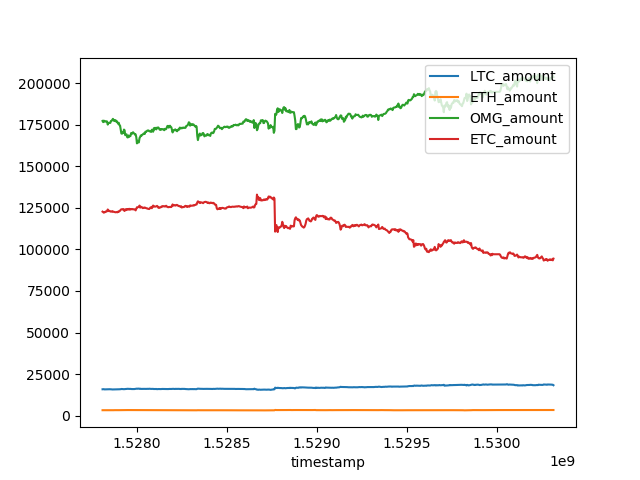

In [11]:
df[[f'{coin}_amount' for coin in backtester.held_coins]].plot()

In [4]:
backtester.get_dataframe_for_coin('LTC')

,amount,coin,portion,unit_price,value
timestamp,,,,,
1527811200,15835.814278,LTC,0.25,0.015787,250.000000
1527814800,15899.353832,LTC,0.25,0.015773,250.780349
1527818400,15895.906442,LTC,0.25,0.015733,250.090296
1527822000,15772.205866,LTC,0.25,0.015820,249.516297
1527825600,15792.200177,LTC,0.25,0.015793,249.406217
1527829200,15795.126279,LTC,0.25,0.015750,248.773239
1527832800,15811.294542,LTC,0.25,0.015750,249.027889
1527836400,15796.816275,LTC,0.25,0.015829,250.047805
1527840000,15865.751234,LTC,0.25,0.015728,249.536535


In [5]:
backtester.get_benchmark_trading_dataframe_for_coin('LTC')[['crypto', 'total_value']].join(backtester.get_dataframe_for_coin('LTC'))

,crypto,total_value,amount,coin,portion,unit_price,value
timestamp,,,,,,,
1527811200,15819.978463,249.750000,15835.814278,LTC,0.25,0.015787,250.000000
1527814800,15819.978463,249.528362,15899.353832,LTC,0.25,0.015773,250.780349
1527818400,15819.978463,248.895721,15895.906442,LTC,0.25,0.015733,250.090296
1527822000,15819.978463,250.272059,15772.205866,LTC,0.25,0.015820,249.516297
1527825600,15819.978463,249.844920,15792.200177,LTC,0.25,0.015793,249.406217
1527829200,15819.978463,249.164661,15795.126279,LTC,0.25,0.015750,248.773239
1527832800,15819.978463,249.164661,15811.294542,LTC,0.25,0.015750,249.027889
1527836400,15819.978463,250.414439,15796.816275,LTC,0.25,0.015829,250.047805
1527840000,15819.978463,248.816621,15865.751234,LTC,0.25,0.015728,249.536535


In [6]:
pd.set_option('display.max_columns', 300)
backtester.get_benchmark_trading_df_for_all_coins()

,close_price_LTC,signal_LTC,order_LTC,cash_LTC,crypto_LTC,total_value_LTC,order_obj_LTC,signal_obj_LTC,return_from_initial_investment_LTC,return_relative_to_past_tick_LTC,close_price_ETH,signal_ETH,order_ETH,cash_ETH,crypto_ETH,total_value_ETH,order_obj_ETH,signal_obj_ETH,return_from_initial_investment_ETH,return_relative_to_past_tick_ETH,close_price_OMG,signal_OMG,order_OMG,cash_OMG,crypto_OMG,total_value_OMG,order_obj_OMG,signal_obj_OMG,return_from_initial_investment_OMG,return_relative_to_past_tick_OMG,close_price_ETC,signal_ETC,order_ETC,cash_ETC,crypto_ETC,total_value_ETC,order_obj_ETC,signal_obj_ETC,return_from_initial_investment_ETC,return_relative_to_past_tick_ETC,total_value
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1527811200,0.015787,,BUY,0.0,15819.978463,249.750000,2018/06/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.077209,,BUY,0.0,3234.726522,249.750000,2018/06/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.001410,,BUY,0.0,177127.659574,249.750000,2018/06/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.002037,,BUY,0.0,122606.774669,249.750000,2018/06/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,999.000000
1527814800,0.015773,,,0.0,15819.978463,249.528362,None,None,-0.001887,-0.000887,0.077277,,,0.0,3234.726522,249.969961,None,None,-0.000120,0.000881,0.001420,,,0.0,177127.659574,251.521277,None,None,0.006085,0.007092,0.002048,,,0.0,122606.774669,251.098675,None,None,0.004395,0.005400,1002.118275
1527818400,0.015733,,,0.0,15819.978463,248.895721,None,None,-0.004417,-0.002535,0.077221,,,0.0,3234.726522,249.788817,None,None,-0.000845,-0.000725,0.001409,,,0.0,177127.659574,249.572872,None,None,-0.001709,-0.007746,0.002048,,,0.0,122606.774669,251.098675,None,None,0.004395,0.000000,999.356085
1527822000,0.015820,,,0.0,15819.978463,250.272059,None,None,0.001088,0.005530,0.076445,,,0.0,3234.726522,247.278669,None,None,-0.010885,-0.010049,0.001410,,,0.0,177127.659574,249.750000,None,None,-0.001000,0.000710,0.002037,,,0.0,122606.774669,249.750000,None,None,-0.001000,-0.005371,997.050728
1527825600,0.015793,,,0.0,15819.978463,249.844920,None,None,-0.000620,-0.001707,0.076549,,,0.0,3234.726522,247.615080,None,None,-0.009540,0.001360,0.001408,,,0.0,177127.659574,249.395745,None,None,-0.002417,-0.001418,0.002037,,,0.0,122606.774669,249.750000,None,None,-0.001000,0.000000,996.605745
1527829200,0.015750,,,0.0,15819.978463,249.164661,None,None,-0.003341,-0.002723,0.076540,,,0.0,3234.726522,247.585968,None,None,-0.009656,-0.000118,0.001406,,,0.0,177127.659574,249.041489,None,None,-0.003834,-0.001420,0.002025,,,0.0,122606.774669,248.278719,None,None,-0.006885,-0.005891,994.070837
1527832800,0.015750,,,0.0,15819.978463,249.164661,None,None,-0.003341,0.000000,0.076740,,,0.0,3234.726522,248.232913,None,None,-0.007068,0.002613,0.001406,,,0.0,177127.659574,249.041489,None,None,-0.003834,0.000000,0.002028,,,0.0,122606.774669,248.646539,None,None,-0.005414,0.001481,995.085602
1527836400,0.015829,,,0.0,15819.978463,250.414439,None,None,0.001658,0.005016,0.077041,,,0.0,3234.726522,249.206566,None,None,-0.003174,0.003922,0.001413,,,0.0,177127.659574,250.281383,None,None,0.001126,0.004979,0.002033,,,0.0,122606.774669,249.259573,None,None,-0.002962,0.002465,999.161961
1527840000,0.015728,,,0.0,15819.978463,248.816621,None,None,-0.004734,-0.006381,0.077044,,,0.0,3234.726522,249.216270,None,None,-0.003135,0.000039,0.001425,,,0.0,177127.659574,252.406915,None,None,0.009628,0.008493,0.002012,,,0.0,122606.774669,246.684831,None,None,-0.013261,-0.010330,997.124637


In [7]:
backtester.get_rebalancing_vs_benchmark_dataframe()

,ETC_amount,ETC_coin,ETC_portion,ETC_timestamp,ETC_unit_price,ETC_value,ETH_amount,ETH_coin,ETH_portion,ETH_timestamp,ETH_unit_price,ETH_value,LTC_amount,LTC_coin,LTC_portion,LTC_timestamp,LTC_unit_price,LTC_value,OMG_amount,OMG_coin,OMG_portion,OMG_timestamp,OMG_unit_price,OMG_value,total_value_rebalancing,close_price_LTC,signal_LTC,order_LTC,cash_LTC,crypto_LTC,total_value_LTC,order_obj_LTC,signal_obj_LTC,return_from_initial_investment_LTC,return_relative_to_past_tick_LTC,close_price_ETH,signal_ETH,order_ETH,cash_ETH,crypto_ETH,total_value_ETH,order_obj_ETH,signal_obj_ETH,return_from_initial_investment_ETH,return_relative_to_past_tick_ETH,close_price_OMG,signal_OMG,order_OMG,cash_OMG,crypto_OMG,total_value_OMG,order_obj_OMG,signal_obj_OMG,return_from_initial_investment_OMG,return_relative_to_past_tick_OMG,close_price_ETC,signal_ETC,order_ETC,cash_ETC,crypto_ETC,total_value_ETC,order_obj_ETC,signal_obj_ETC,return_from_initial_investment_ETC,return_relative_to_past_tick_ETC,total_value_benchmark
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-06-01 00:00:00,122729.504173,ETC,0.25,1527811200,0.002037,250.000000,3237.964486,ETH,0.25,1527811200,0.077209,250.000000,15835.814278,LTC,0.25,1527811200,0.015787,250.000000,177304.964539,OMG,0.25,1527811200,0.001410,250.000000,1000.000000,0.015787,,BUY,0.0,15819.978463,249.750000,2018/06/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.077209,,BUY,0.0,3234.726522,249.750000,2018/06/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.001410,,BUY,0.0,177127.659574,249.750000,2018/06/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,0.002037,,BUY,0.0,122606.774669,249.750000,2018/06/01 00:00:00 UTC \t OrderType.BUY \...,None,-0.001000,NaN,999.000000
2018-06-01 01:00:00,122451.342287,ETC,0.25,1527814800,0.002048,250.780349,3245.213311,ETH,0.25,1527814800,0.077277,250.780349,15899.353832,LTC,0.25,1527814800,0.015773,250.780349,176605.879581,OMG,0.25,1527814800,0.001420,250.780349,1003.121396,0.015773,,,0.0,15819.978463,249.528362,None,None,-0.001887,-0.000887,0.077277,,,0.0,3234.726522,249.969961,None,None,-0.000120,0.000881,0.001420,,,0.0,177127.659574,251.521277,None,None,0.006085,0.007092,0.002048,,,0.0,122606.774669,251.098675,None,None,0.004395,0.005400,1002.118275
2018-06-01 02:00:00,122114.402373,ETC,0.25,1527818400,0.002048,250.090296,3238.630632,ETH,0.25,1527818400,0.077221,250.090296,15895.906442,LTC,0.25,1527818400,0.015733,250.090296,177494.887196,OMG,0.25,1527818400,0.001409,250.090296,1000.361184,0.015733,,,0.0,15819.978463,248.895721,None,None,-0.004417,-0.002535,0.077221,,,0.0,3234.726522,249.788817,None,None,-0.000845,-0.000725,0.001409,,,0.0,177127.659574,249.572872,None,None,-0.001709,-0.007746,0.002048,,,0.0,122606.774669,251.098675,None,None,0.004395,0.000000,999.356085
2018-06-01 03:00:00,122492.045556,ETC,0.25,1527822000,0.002037,249.516297,3263.997603,ETH,0.25,1527822000,0.076445,249.516297,15772.205866,LTC,0.25,1527822000,0.015820,249.516297,176961.912622,OMG,0.25,1527822000,0.001410,249.516297,998.065187,0.015820,,,0.0,15819.978463,250.272059,None,None,0.001088,0.005530,0.076445,,,0.0,3234.726522,247.278669,None,None,-0.010885,-0.010049,0.001410,,,0.0,177127.659574,249.750000,None,None,-0.001000,0.000710,0.002037,,,0.0,122606.774669,249.750000,None,None,-0.001000,-0.005371,997.050728
2018-06-01 04:00:00,122438.005591,ETC,0.25,1527825600,0.002037,249.406217,3258.125088,ETH,0.25,1527825600,0.076549,249.406217,15792.200177,LTC,0.25,1527825600,0.015793,249.406217,177135.097577,OMG,0.25,1527825600,0.001408,249.406217,997.624870,0.015793,,,0.0,15819.978463,249.844920,None,None,-0.000620,-0.001707,0.076549,,,0.0,3234.726522,247.615080,None,None,-0.009540,0.001360,0.001408,,,0.0,177127.659574,249.395745,None,None,-0.002417,-0.001418,0.002037,,,0.0,122606.774669,249.750000,None,None,-0.001000,0.000000,996.605745
2018-06-01 05:00:00,122850.982168,ETC,0.25,1527829200,0.002025,248.773239,3250.238292,ETH,0.25,1527829200,0.0

<IPython.core.display.Javascript object>


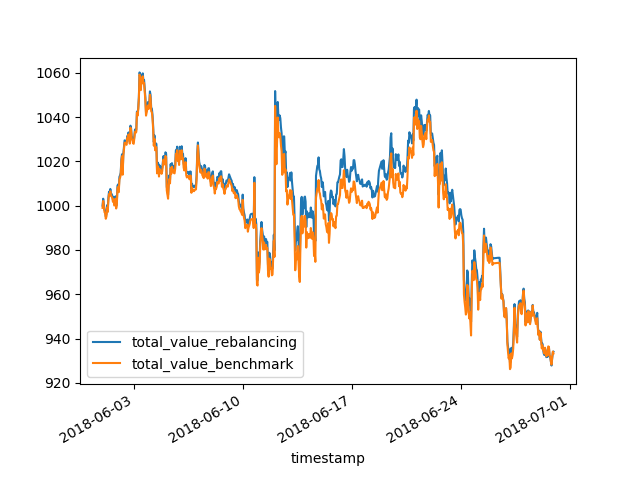

In [8]:
backtester.get_rebalancing_vs_benchmark_dataframe()[['total_value_rebalancing', 'total_value_benchmark']].plot()

In [9]:
pd.set_option('display.max_rows', 1000)
backtester.get_rebalancing_vs_benchmark_dataframe()[['total_value_rebalancing', 'total_value_benchmark']]

,total_value_rebalancing,total_value_benchmark
timestamp,,
2018-06-01 00:00:00,1000.000000,999.000000
2018-06-01 01:00:00,1003.121396,1002.118275
2018-06-01 02:00:00,1000.361184,999.356085
2018-06-01 03:00:00,998.065187,997.050728
2018-06-01 04:00:00,997.624870,996.605745
2018-06-01 05:00:00,995.092956,994.070837
2018-06-01 06:00:00,996.111556,995.085602
2018-06-01 07:00:00,1000.191219,999.161961
2018-06-01 08:00:00,998.146142,997.124637
